## Simple Introudction :
 
 * This Dataset from kaggel .
 * this Dataset contain on Growth_Milestone (Target) and some factors that affecting on it 
 * This problem consider as binary classificaton , we should classify if the person have Animai or not (1,0)
 * Part1 : 
   *  contain Some Analysis on the Data , DataExplantory additional to preparing and cleaning the data
 * part2 : Contain
     * i will use some traditional machine learning Techiqes such RandomForestClassificaion,NaivaBase,LogisticRegression,DescisonTree,Support Vector Machine 
     * i will use some Neural Networks Techniqes by using Tensorflow. 

## About Dataset :

* Target : predict & classify the growth milestone of plants based on the provided environmental and management factors .

* our Aim :  to predict the growth stage or milestone that a plant .

* Features:

* Here about the description of the columns
   
   * Soil_Type: The type or composition of soil in which the plants are grown.
   
   * Sunlight_Hours: The duration or intensity of sunlight exposure received by the plants.

   * Water_Frequency: How often the plants are watered, indicating the watering schedule.

   * Fertilizer_Type: The type of fertilizer used for nourishing the plants.

   * Temperature: The ambient temperature conditions under which the plants are grown.

   * Humidity: The level of moisture or humidity in the environment surrounding the plants.

   * Growth_Milestone: Descriptions or markers indicating stages or significant events in the growth process of the plants.



 ## --->>> * if you founf my Notebook usefull upvote me * <<---- 

In [87]:
# imports:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import IPython.display
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator , TransformerMixin
from sklearn.feature_selection import VarianceThreshold ,f_classif ,SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix ,ConfusionMatrixDisplay
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

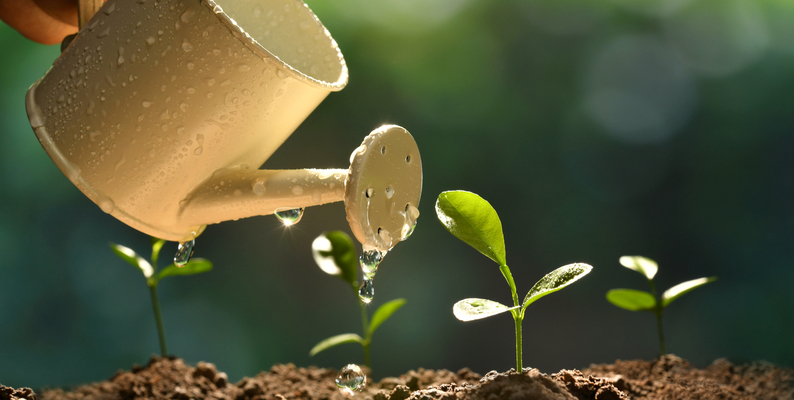

In [88]:
# Display the image
IPython.display.Image("dataset-cover.png")

## Part1 : Analysis ,Visualization and preparing the dataset

In [2]:
# loading the dataset:

data=pd.read_csv("plant_growth_data.csv")
data.head(25)

,Soil_Type,Sunlight_Hours,Water_Frequency,Fertilizer_Type,Temperature,Humidity,Growth_Milestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
5,sandy,8.627622,bi-weekly,none,20.004858,67.618726,0
6,loam,4.444268,daily,organic,25.984533,69.578952,1
7,clay,6.150794,daily,organic,29.291918,69.480907,0
8,loam,4.695214,bi-weekly,none,28.203948,34.560305,1
9,loam,9.178621,weekly,organic,20.598678,54.721015,1


In [3]:
# get info about the dataset:
print(data.info())
print("-"*25)
# to know more about the shape of the dataset:
print("shape of the dataset -->>",np.shape(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Soil_Type         193 non-null    object 
 1   Sunlight_Hours    193 non-null    float64
 2   Water_Frequency   193 non-null    object 
 3   Fertilizer_Type   193 non-null    object 
 4   Temperature       193 non-null    float64
 5   Humidity          193 non-null    float64
 6   Growth_Milestone  193 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 10.7+ KB
None
-------------------------
shape of the dataset -->> (193, 7)


In [4]:
# Make some Statisticals on the dataset :

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sunlight_Hours,193.0,6.826484,1.599509,4.033133,5.477000,6.833290,8.241144,9.913903
Temperature,193.0,25.076087,5.354170,15.200000,20.637095,25.912336,29.757938,34.810103
Humidity,193.0,58.098927,12.631799,30.567682,49.300000,59.182806,69.100000,79.648240
Growth_Milestone,193.0,0.497409,0.501294,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
# Extract all Types of columns from the data :
for col in data.columns:
    obj_cols=data.select_dtypes("object").columns
    num_cols=data.select_dtypes("number").columns
    disc_cols=data.select_dtypes(include=("int64")).columns
    conts_cols=data.select_dtypes(include=("float64")).columns
    Nomial_cols=data.nunique()[data.nunique()<3]

print(f"object_columns ----->>> {obj_cols}\n Numerical_columns ----->>> {num_cols} \n Discrete_columns ---->>> {disc_cols} \n Continous_cols ----->> {conts_cols} \n Nominal Columns --->> {Nomial_cols}")

object_columns ----->>> Index(['Soil_Type', 'Water_Frequency', 'Fertilizer_Type'], dtype='object')
 Numerical_columns ----->>> Index(['Sunlight_Hours', 'Temperature', 'Humidity', 'Growth_Milestone'], dtype='object') 
 Discrete_columns ---->>> Index(['Growth_Milestone'], dtype='object') 
 Continous_cols ----->> Index(['Sunlight_Hours', 'Temperature', 'Humidity'], dtype='object') 
 Nominal Columns --->> Growth_Milestone    2
dtype: int64


In [6]:
# discovel all Types of data:
data.dtypes

Soil_Type            object
Sunlight_Hours      float64
Water_Frequency      object
Fertilizer_Type      object
Temperature         float64
Humidity            float64
Growth_Milestone      int64
dtype: object

In [7]:
#check if there null values in data:
# NO Found any null values :
data.isna().mean()

Soil_Type           0.0
Sunlight_Hours      0.0
Water_Frequency     0.0
Fertilizer_Type     0.0
Temperature         0.0
Humidity            0.0
Growth_Milestone    0.0
dtype: float64

In [8]:
//# know the number of every item in every column:

for col in data.columns:
    print(f"counts of items in {col} -->> \n {data[col].value_counts()}")
    print("-"*25)

counts of items in Soil_Type -->> 
 Soil_Type
clay     67
sandy    64
loam     62
Name: count, dtype: int64
-------------------------
counts of items in Sunlight_Hours -->> 
 Sunlight_Hours
7.528000    2
6.917000    2
6.127000    2
4.118000    1
7.456000    1
           ..
7.112744    1
8.218114    1
6.181778    1
9.830692    1
6.732000    1
Name: count, Length: 190, dtype: int64
-------------------------
counts of items in Water_Frequency -->> 
 Water_Frequency
daily        74
bi-weekly    60
weekly       59
Name: count, dtype: int64
-------------------------
counts of items in Fertilizer_Type -->> 
 Fertilizer_Type
none        74
chemical    65
organic     54
Name: count, dtype: int64
-------------------------
counts of items in Temperature -->> 
 Temperature
31.700000    2
22.000000    2
30.000000    2
27.900000    2
31.719602    1
            ..
20.637095    1
17.363297    1
28.934743    1
27.578857    1
21.700000    1
Name: count, Length: 189, dtype: int64
------------------------

In [9]:
# clean the columns of the dataset from precentage sign _:
# Remove special characters from column names
data.columns = data.columns.str.replace('[^A-Za-z0-9]', '', regex=True) # this mean that will Remove all characters except the characters and Numbers :
data

,SoilType,SunlightHours,WaterFrequency,FertilizerType,Temperature,Humidity,GrowthMilestone
0,loam,5.192294,bi-weekly,chemical,31.719602,61.591861,0
1,sandy,4.033133,weekly,organic,28.919484,52.422276,1
2,loam,8.892769,bi-weekly,none,23.179059,44.660539,0
3,loam,8.241144,bi-weekly,none,18.465886,46.433227,0
4,sandy,8.374043,bi-weekly,organic,18.128741,63.625923,0
...,...,...,...,...,...,...,...
188,sandy,5.652000,daily,none,28.000000,70.200000,0
189,clay,7.528000,weekly,chemical,30.500000,60.100000,1
190,loam,4.934000,bi-weekly,none,24.500000,61.700000,0
191,sandy,8.273000,daily,organic,27.900000,69.500000,1


In [10]:
# to know the uniques values in evey column in the dataset:
for col in data.columns:
    print(f"All items in the ---->>>{col} column  :  \n{data[col].unique()}")
    print("*"*50)

All items in the ---->>>SoilType column  :  
['loam' 'sandy' 'clay']
**************************************************
All items in the ---->>>SunlightHours column  :  
[5.19229409 4.0331327  8.89276857 8.24114406 8.37404301 8.62762208
 4.44426791 6.15079437 4.69521436 9.17862056 7.73978876 5.98538815
 4.3813501  5.86589393 5.95109993 8.37763707 7.82534483 9.32327646
 6.83328955 4.71756548 8.27946872 8.56471029 7.36766319 8.62580308
 6.96277358 7.13639698 6.56524611 4.15251476 4.64734856 4.18857511
 7.81846247 5.88613589 7.05142415 9.44539884 5.49575337 6.46229754
 8.53330683 5.37278899 4.46187946 5.73850872 4.96732772 9.57818591
 8.84872228 7.80042254 9.22876354 8.82203246 5.11942035 9.35535399
 7.23605345 8.84464093 9.3765478  5.90802085 4.66031155 5.36761098
 6.56264673 8.9080886  9.1643835  4.04171278 7.06448382 6.50446602
 5.33264686 4.7191922  6.02569103 9.65745822 5.93921759 7.11274373
 8.21811375 6.18177761 9.8306925  9.77468377 5.51069377 6.98349104
 5.80526986 5.70904297 4.2

## Make some Visualization to cover the Dataset:

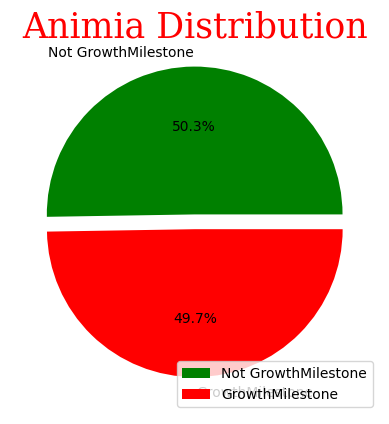

In [11]:
# to observe how many have the GrowthMilestone:
f={"family":"serif","size":25,"color":"r"}
plt.title("Animia Distribution",fontdict=f)
explicit=data["GrowthMilestone"].value_counts()
plt.pie(x=explicit,labels=["Not GrowthMilestone","GrowthMilestone"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%')
plt.legend()
plt.show()

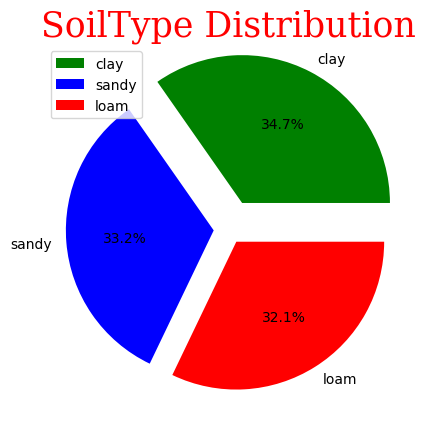

In [12]:
# to observe how many of the SoilType ::

plt.title("SoilType Distribution",fontdict=f)
explicit=data["SoilType"].value_counts()
plt.pie(x=explicit,labels=["clay","sandy","loam"],colors=["g","b","r"],explode=[0.2,0.1,0.1],autopct='%1.1f%%')  
plt.legend()
plt.show()

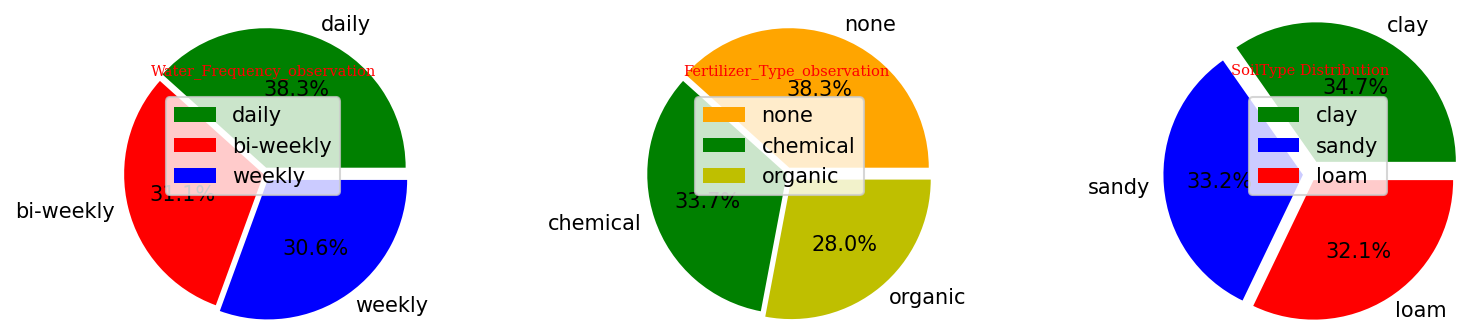

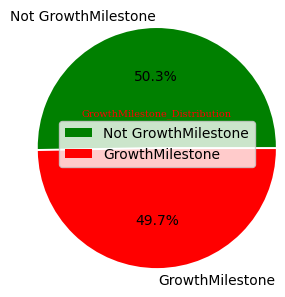

<Figure size 640x480 with 0 Axes>

In [13]:
# Font style for titles
f1 = {"family": "serif", "size": 7, "color": "r"}

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 15), dpi=150)

# Plot 1

Water_Frequency = data["WaterFrequency"].value_counts()
plt.subplot(4, 4, 1)  # Create the first subplot
plt.pie(
    x=Water_Frequency,
    labels=["daily", "bi-weekly","weekly"],
    colors=["g","r","b"],
    explode=[0.1, 0,0.1],
    autopct='%1.1f%%',
    radius=2,
)                                                                     

plt.title("Water_Frequency_observation", fontdict=f1)
plt.legend()


# Plot 2

Fertilizer_Type = data["FertilizerType"].value_counts()
plt.subplot(4, 4, 2)  # Create the second subplot
plt.pie(
    x=Fertilizer_Type,
    labels=["none", "chemical","organic"],
    colors=["orange","g","y"],
    explode=[0.1, 0,0.1],
    autopct='%1.1f%%',
    radius=2,
)
plt.title("Fertilizer_Type_observation", fontdict=f1)
plt.legend()
# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)

#plot3:

# to observe how many of the SoilType ::


plt.subplot(4,4,3)
explicit=data["SoilType"].value_counts()
plt.pie(x=explicit,labels=["clay","sandy","loam"],colors=["g","b","r"],explode=[0.2,0.1,0.1],autopct='%1.1f%%',radius=2)  
plt.title("SoilType Distribution",fontdict=f1)
plt.legend()
plt.show()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)

# plot4:

# to observe how many have the GrowthMilestone:
plt.subplot(4,4,4)
plt.title("GrowthMilestone_Distribution",fontdict=f1)
explicit=data["GrowthMilestone"].value_counts()
plt.pie(x=explicit,labels=["Not GrowthMilestone","GrowthMilestone"],colors=["g","r"],explode=[0.1,0],autopct='%1.1f%%',radius=6)
plt.legend()
plt.show()

# pacing between subplots
plt.subplots_adjust(wspace=2,hspace=1)



/tmp/ipykernel_61639/2815856890.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.index,y=top.values,color="r",palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


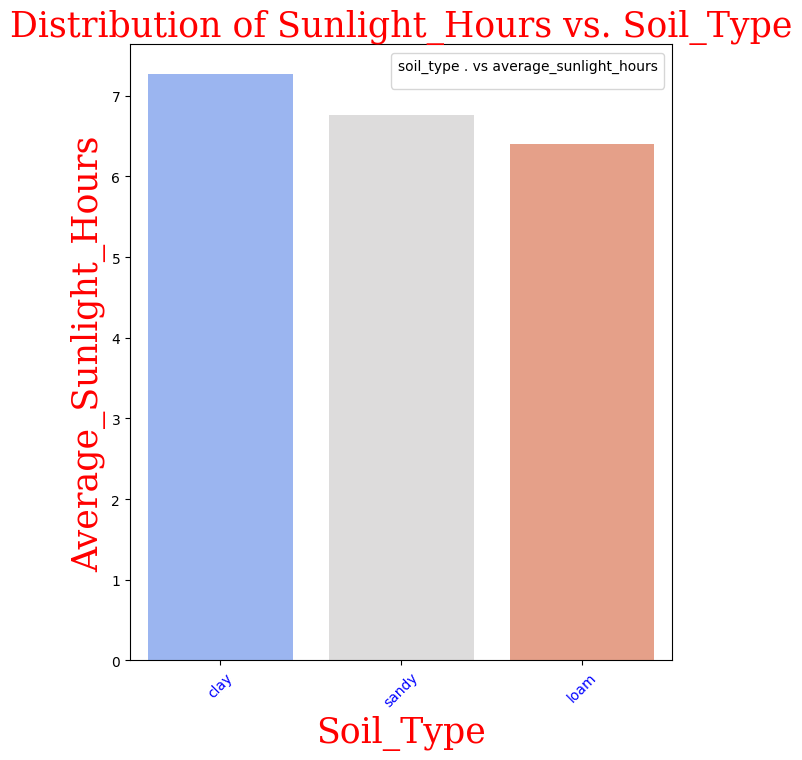

In [14]:
# to observe how many of hours_sunlght for every soil type:

# oserve the Soil_Type vs. Sunlight_Hours:

plt.figure(figsize=(7,8))
plt.title("Distribution of Sunlight_Hours vs. Soil_Type",fontdict=f)
top=data.groupby("SoilType")["SunlightHours"].mean().sort_values(ascending=False)
sns.barplot(x=top.index,y=top.values,color="r",palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("Soil_Type",fontdict=f)
plt.ylabel("Average_Sunlight_Hours",fontdict=f)
plt.legend(title="soil_type . vs average_sunlight_hours",prop={'size': 12})

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


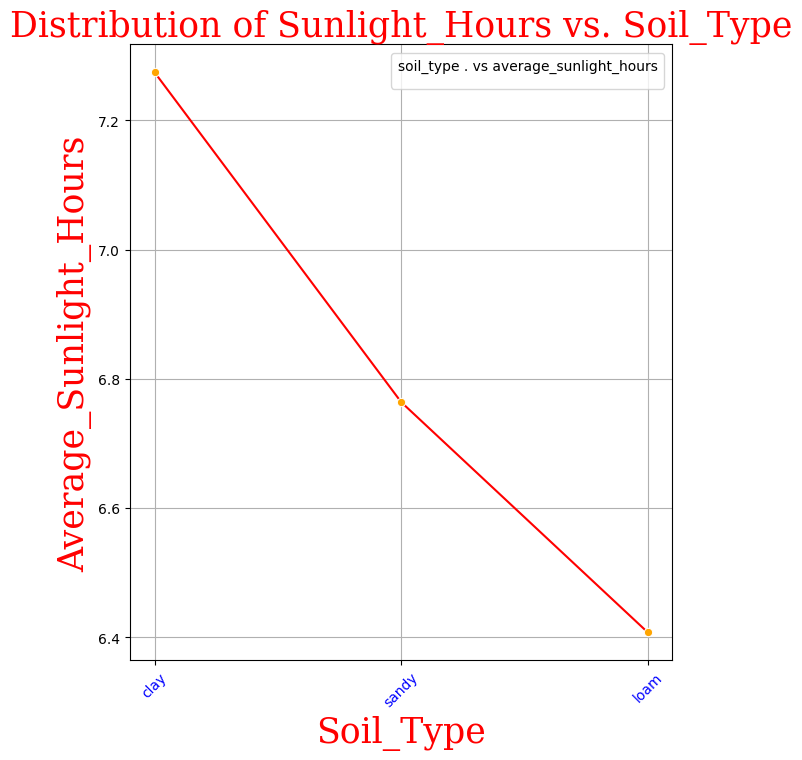

In [15]:
# oserve the Soil_Type vs. Sunlight_Hours:

plt.figure(figsize=(7,8))
plt.title("Distribution of Sunlight_Hours vs. Soil_Type",fontdict=f)
top=data.groupby("SoilType")["SunlightHours"].mean().sort_values(ascending=False)
sns.lineplot(x=top.index,y=top.values,color="r",marker="o",mfc="orange")
plt.xticks(rotation=45,color="b")
plt.xlabel("Soil_Type",fontdict=f)
plt.ylabel("Average_Sunlight_Hours",fontdict=f)
plt.legend(title="soil_type . vs average_sunlight_hours",prop={'size': 12})
plt.grid(True)
plt.show()

/tmp/ipykernel_61639/4140003683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.index,y=top.values,color="r",palette='coolwarm')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


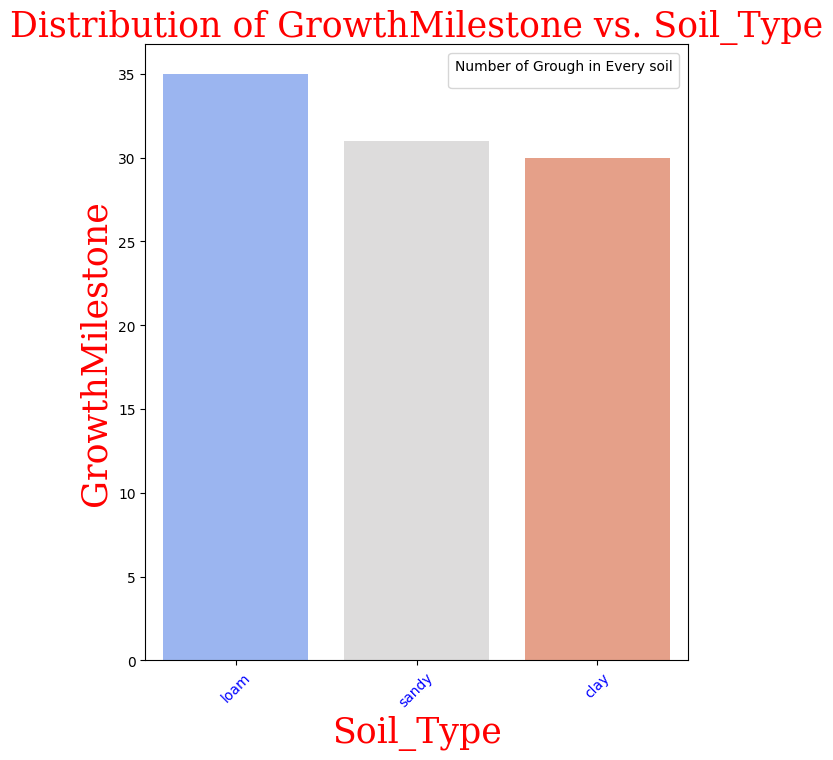

In [16]:
# oserve the Soil_Type vs. GrowthMilestone:
# to know Number of plants in every soil :

plt.figure(figsize=(7,8))
plt.title("Distribution of GrowthMilestone vs. Soil_Type",fontdict=f)
top=data.groupby("SoilType")["GrowthMilestone"].sum().sort_values(ascending=False)
sns.barplot(x=top.index,y=top.values,color="r",palette='coolwarm')
plt.xticks(rotation=45,color="b")
plt.xlabel("Soil_Type",fontdict=f)
plt.ylabel("GrowthMilestone",fontdict=f)
plt.legend(title="Number of Grough in Every soil",prop={'size': 12})
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


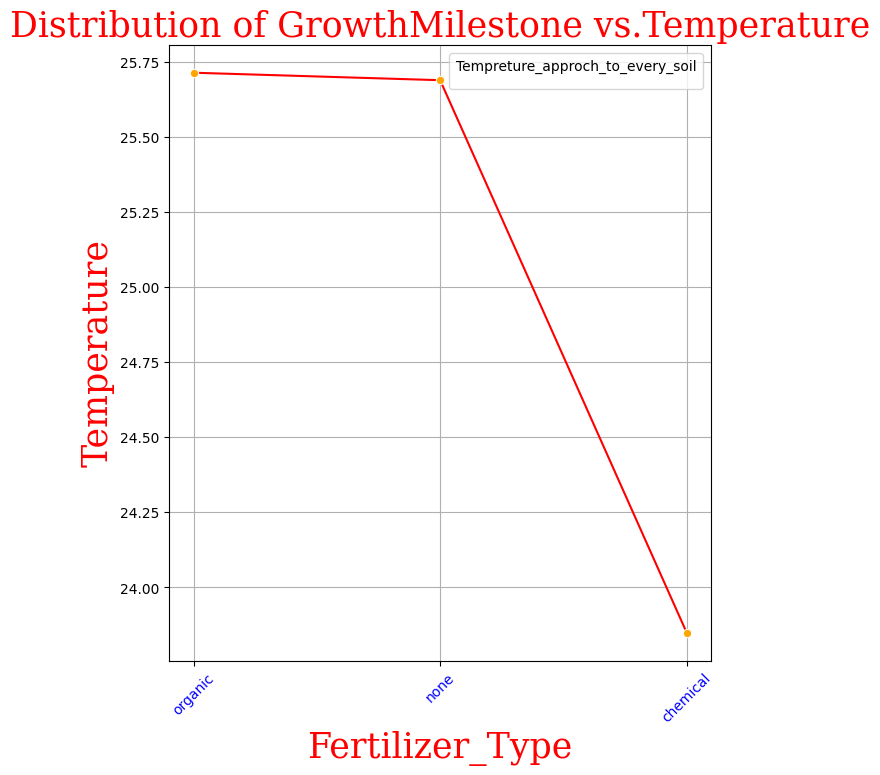

In [17]:
# observe of Fertilizer_Type vs.Temperature  Distribution :
plt.figure(figsize=(7,8))
plt.title("Distribution of GrowthMilestone vs.Temperature",fontdict=f)
top=data.groupby("FertilizerType")["Temperature"].mean().sort_values(ascending=False)
sns.lineplot(x=top.index,y=top.values,color="r",marker="o",mfc="orange")
plt.xticks(rotation=45,color="b")
plt.xlabel("Fertilizer_Type",fontdict=f)
plt.ylabel("Temperature",fontdict=f)
plt.legend(title="Tempreture_approch_to_every_soil",prop={'size': 12})

plt.grid(True)
plt.show()

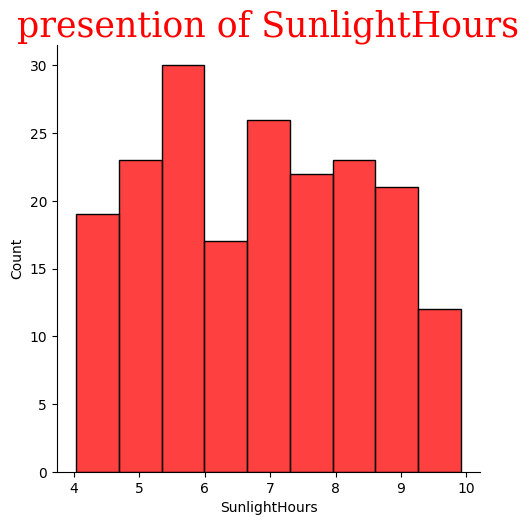

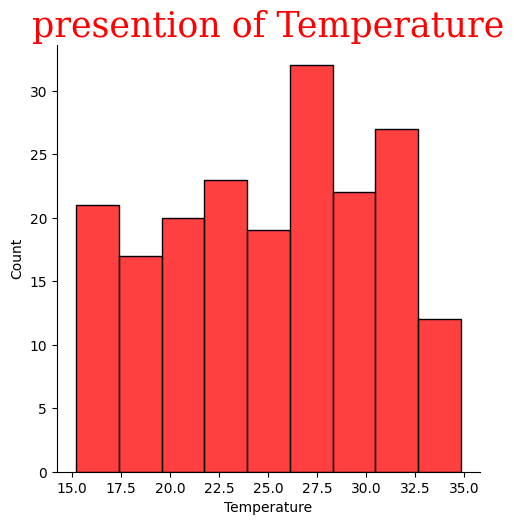

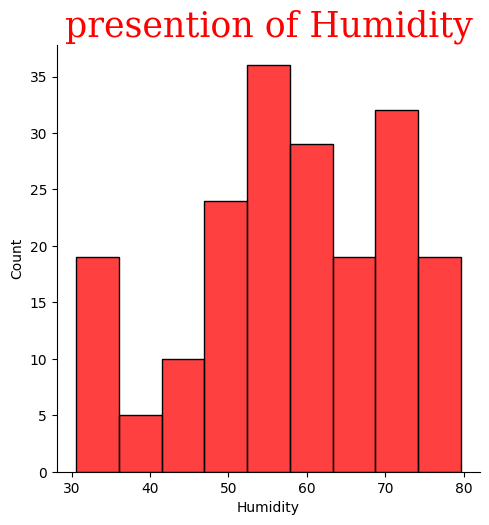

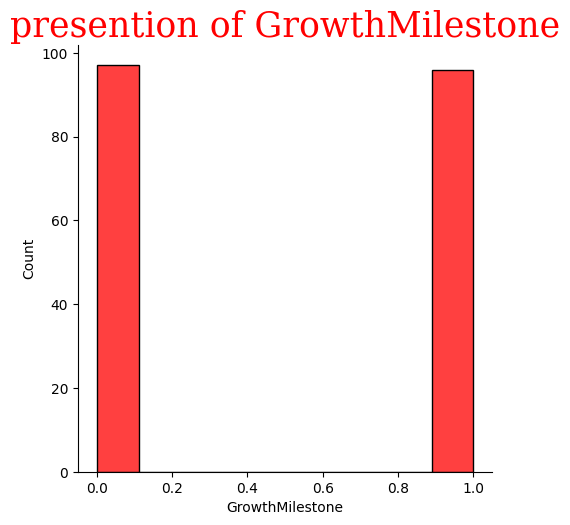

In [18]:
# distplotes for ontinous data:

for col in data.select_dtypes("number"):
    
    sns.displot(data[col],color="r")
    plt.title("presention of "+ col,fontdict=f)

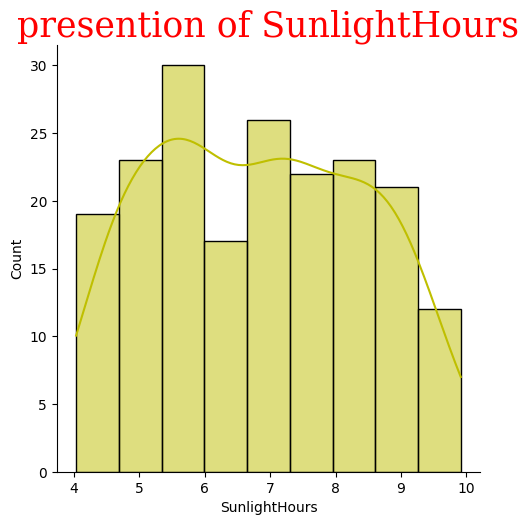

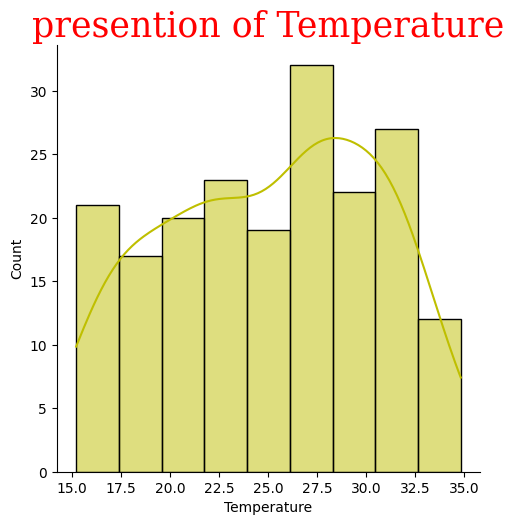

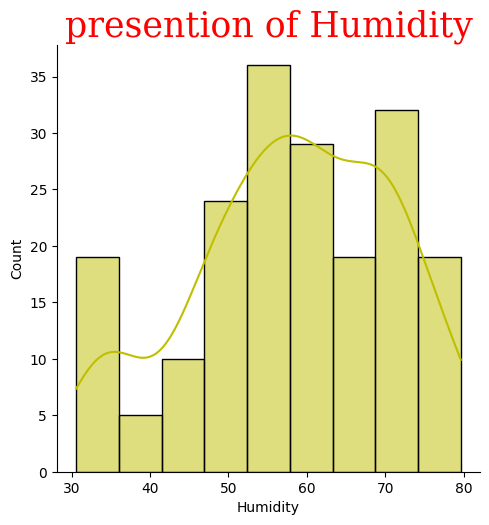

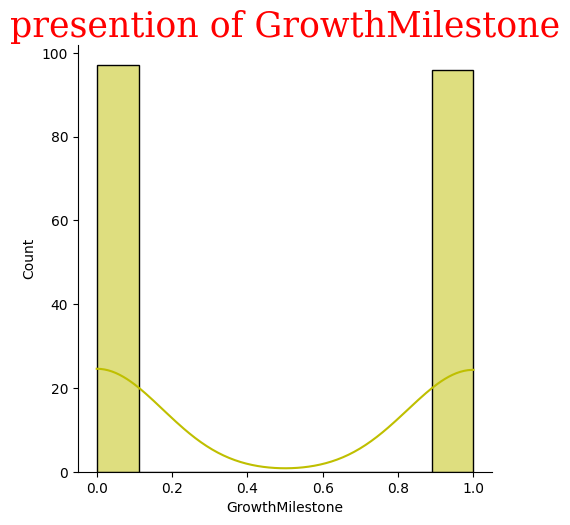

In [19]:
# kde:
for col in data.select_dtypes("number"):
    
    sns.displot(data[col],kde=True,color="y")
    plt.title("presention of "+ col,fontdict=f)

<Figure size 7500x4500 with 0 Axes>

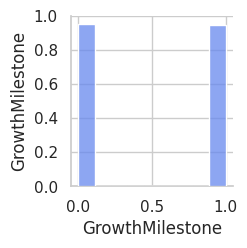

In [20]:
# Create the pair plot for discrete features :
plt.figure(figsize=(25, 15), dpi=300)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='int64'), plot_kws={'alpha': 0.6, 's': 80})

<Figure size 7500x4500 with 0 Axes>

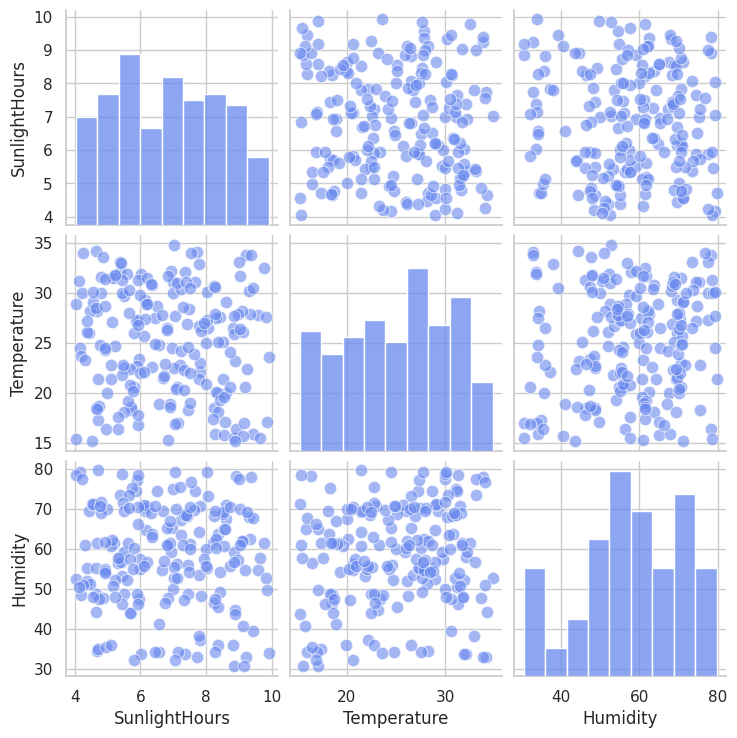

In [21]:
# Create the pair plot for continous features :
plt.figure(figsize=(25, 15), dpi=300)
sns.set(style="whitegrid")  # Set the plot style
sns.set_palette("coolwarm")    # Set the color palette
sns.pairplot(data.select_dtypes(include='float64'), plot_kws={'alpha': 0.6, 's': 80})

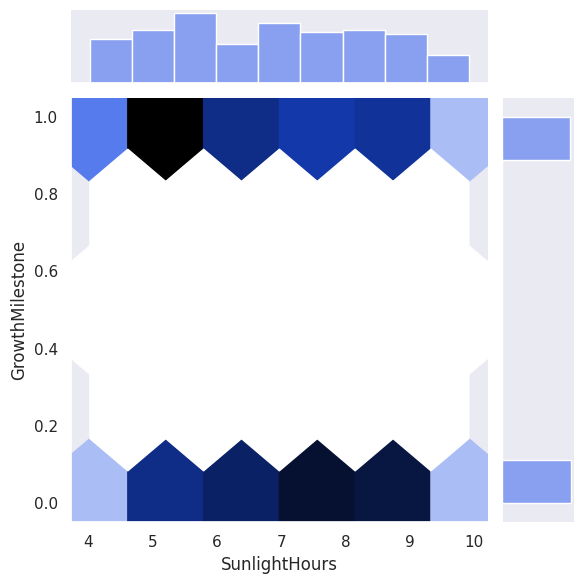

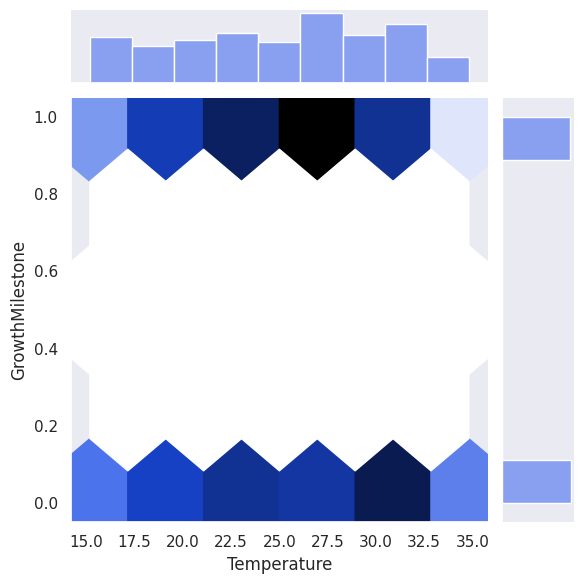

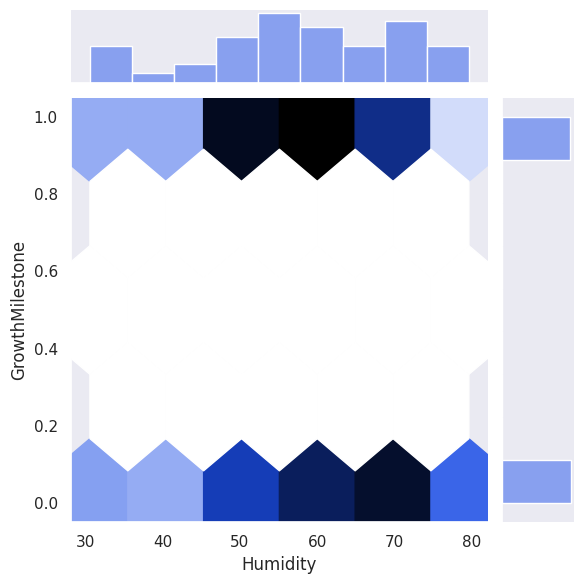

In [22]:
for col in data.select_dtypes(include="float64"):
    if col !="GrowthMilestone":
      with sns.axes_style("white"):
          sns.set(style="dark")
          sns.set_palette("coolwarm")
          sns.jointplot(x=data[col],y=data["GrowthMilestone"],kind="hex")
          

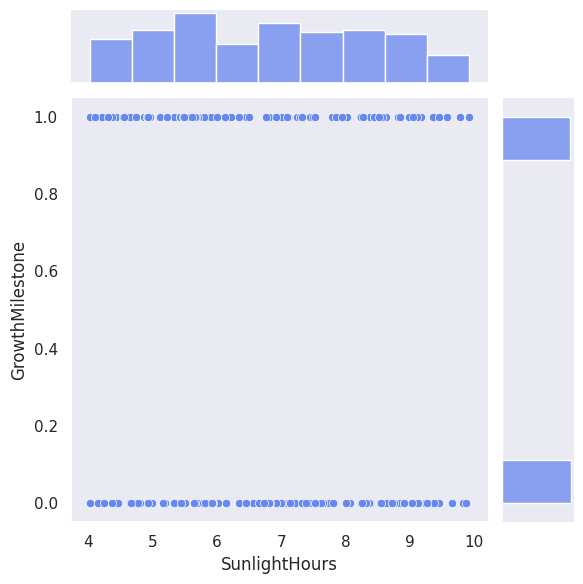

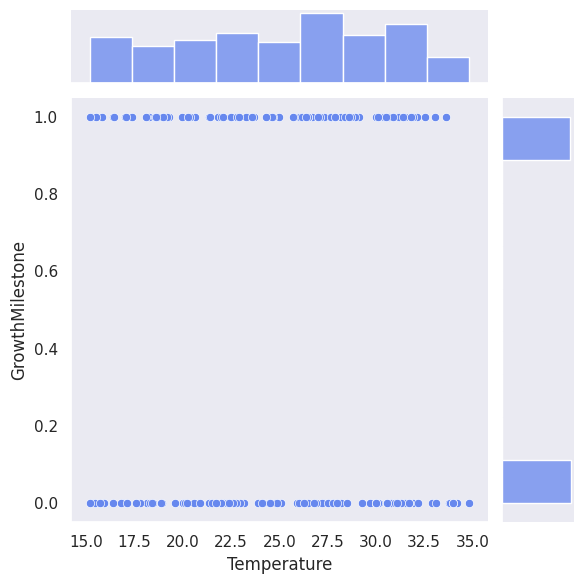

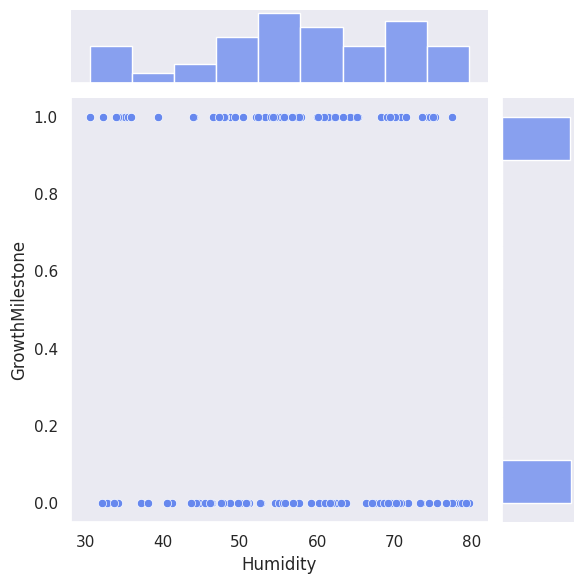

In [23]:
for col in data.select_dtypes(include="float64"):
    if col !="GrowthMilestone":
      with sns.axes_style("white"):
          sns.set(style="dark")
          sns.set_palette("coolwarm")
          sns.jointplot(x=data[col],y=data["GrowthMilestone"],kind="scatter")

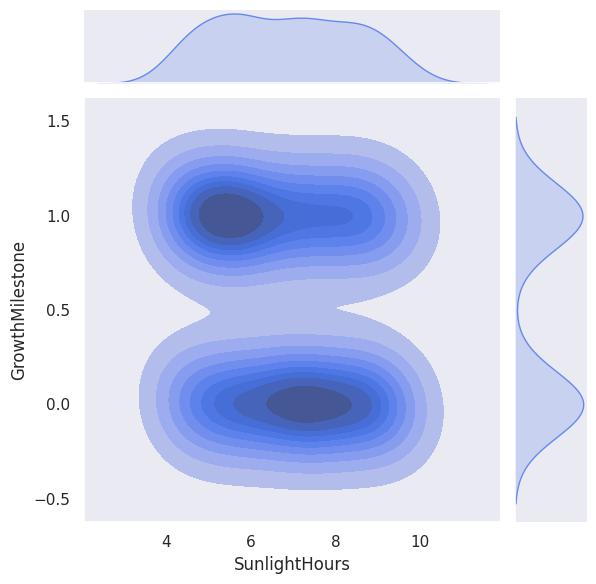

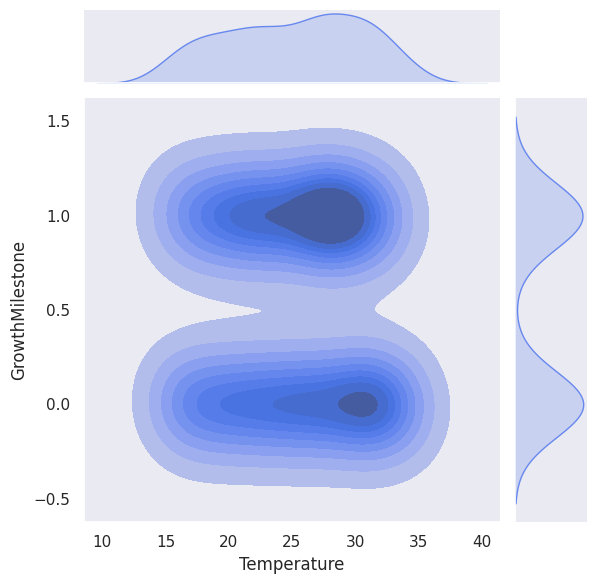

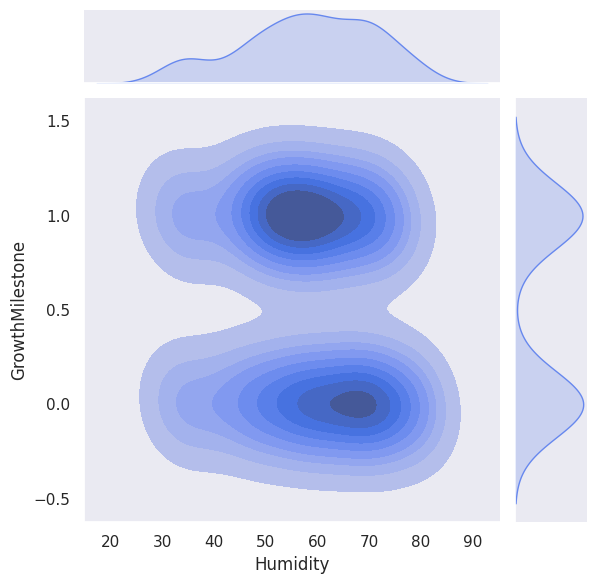

In [24]:
for col in data.select_dtypes(include="float64"):
    if col !="GrowthMilestone":
      with sns.axes_style("white"):
          sns.set(style="dark")
          sns.set_palette("coolwarm")
          sns.jointplot(x=data[col],y=data["GrowthMilestone"],kind="kde",fill=True)

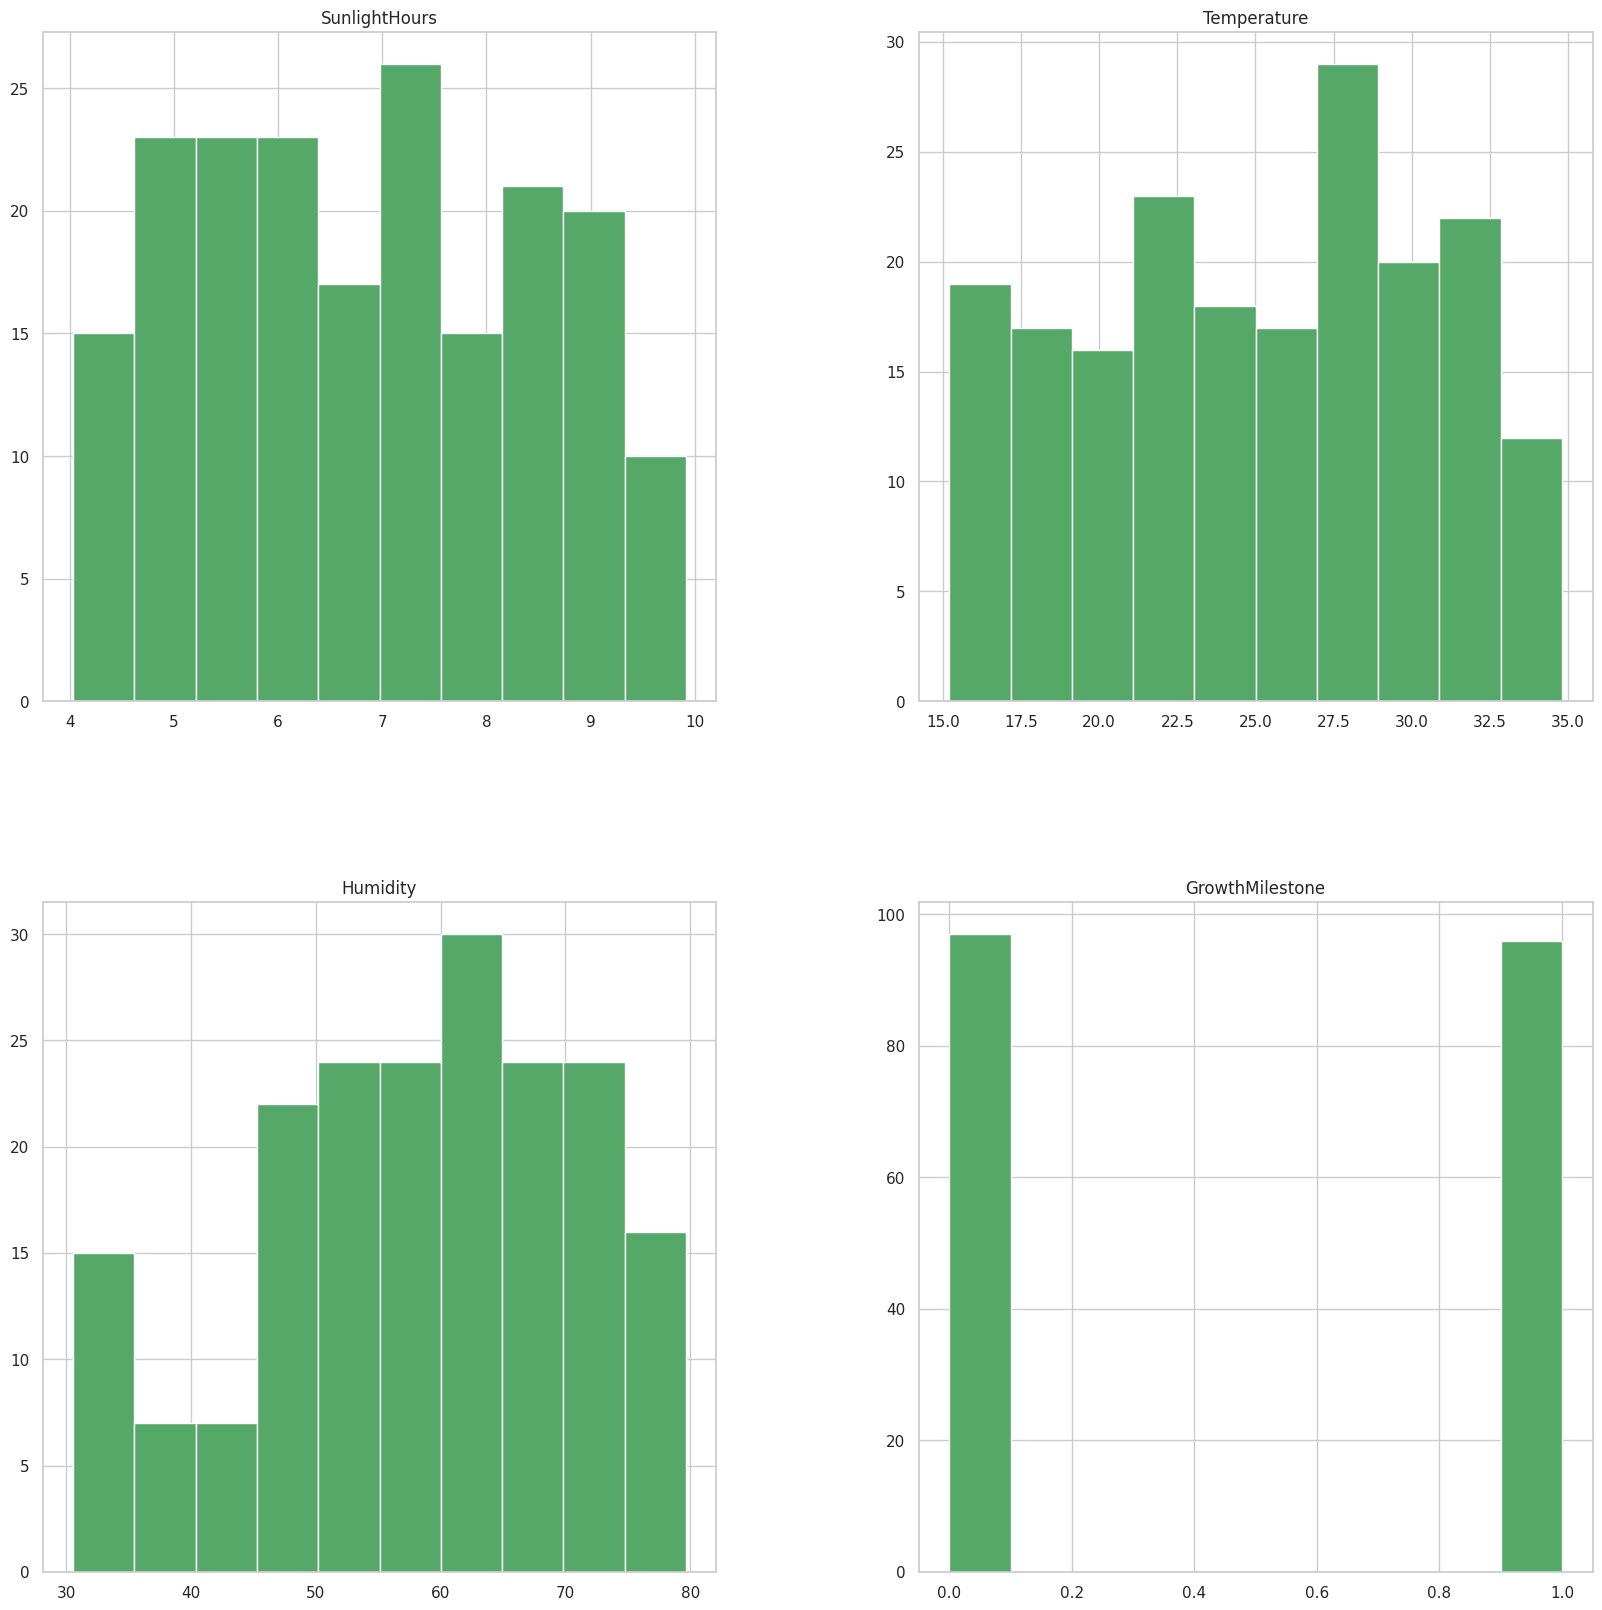

In [25]:
# Histogram for all dataset:
data.hist(figsize=(20,20),color="g")
plt.show()

<Axes: title={'center': 'represention for Humibty rate & Temprature '}, xlabel='Humidity', ylabel='Density'>

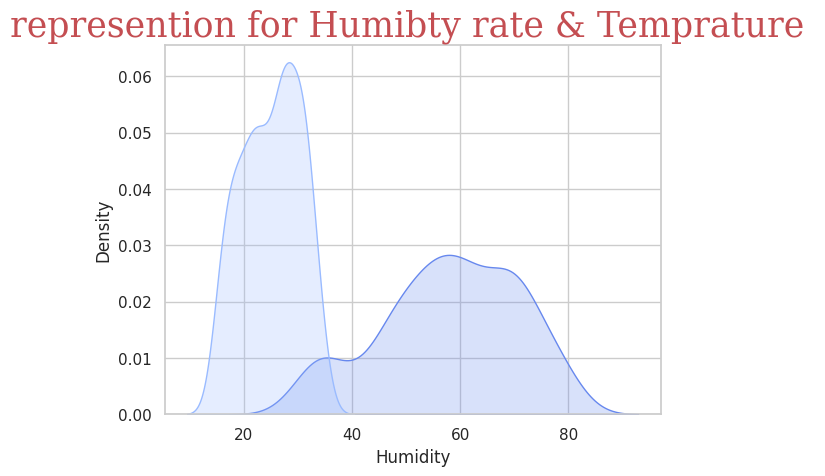

In [26]:
plt.title("represention for Humibty rate & Temprature ",fontdict=f)
sns.set(style="white")
sns.set_palette("coolwarm")
sns.kdeplot(data["Humidity"],fill=True)
sns.kdeplot(data["Temperature"],fill=True)


 ## processing on the dataset : 

In [27]:
# Convert all Categorical columns into Numerical columns :
# All data Become Numerical : 

label_encoder=LabelEncoder()
for col in data.columns:
    data[col]=label_encoder.fit_transform(data[col])
data    

,SoilType,SunlightHours,WaterFrequency,FertilizerType,Temperature,Humidity,GrowthMilestone
0,1,37,0,0,169,113,0
1,2,0,2,2,136,58,1
2,1,165,0,1,74,28,0
3,1,141,0,1,29,32,0
4,2,148,0,2,24,123,0
...,...,...,...,...,...,...,...
188,2,54,1,1,126,154,0
189,0,122,2,0,151,98,1
190,1,30,0,1,85,115,0
191,2,143,1,2,125,148,1


In [28]:
# Standardize the data

features=["SoilType","SunlightHours","WaterFrequency","FertilizerType","Temperature","GrowthMilestone"]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[features]) 
x_scaled

array([[ 0.01887054, -1.05632615, -1.26694729, -1.20411038,  1.36564195,
        -0.99483201],
       [ 1.2328751 , -1.73552883,  1.28014466,  1.34966219,  0.75977865,
         1.00519484],
       [ 0.01887054,  1.293348  , -1.26694729,  0.0727759 , -0.37850998,
        -0.99483201],
       ...,
       [ 0.01887054, -1.18482395, -1.26694729,  0.0727759 , -0.17655555,
        -0.99483201],
       [ 1.2328751 ,  0.88949776,  0.00659868,  1.34966219,  0.55782421,
         1.00519484],
       [-1.19513402, -0.08341419,  1.28014466,  0.0727759 , -0.69062138,
        -0.99483201]])

In [29]:
# Handle the outliers on the ALL features:
#calc Q1,Q2,Q3,IQR and detect the outliers:
#calc the lower & upper limits :


for col in features:
    Q1_col,Q3_col=data[col].quantile([0.25,0.75])
    iqr=Q3_col-Q1_col
    low_limit=Q1_col-1.5*iqr 
    upper_limit=Q3_col+1.5*iqr
    outlier=[]
    for x in data[col]: 
         if ((x> upper_limit) or (x<low_limit)): 
             outlier.append(x)           
    if len(outlier)==0:
        print(f" * -- >> there No outlier in {col} feature")
    else:
        print(f"Ther outlier in this feature {col}")
       
    print(f"Q1 of {col} --->>> {Q1_col} \n Q3 of {col} ---->>> {Q3_col} \n iqr--->>{iqr}\n low_limit--->>>{low_limit} \n  upper_limit--->>> {upper_limit} \n outlier---->>> {outlier} \n Number of outliers --->>> {len(outlier)}")
    print("-"*25)

 * -- >> there No outlier in SoilType feature
Q1 of SoilType --->>> 0.0 
 Q3 of SoilType ---->>> 2.0 
 iqr--->>2.0
 low_limit--->>>-3.0 
  upper_limit--->>> 5.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in SunlightHours feature
Q1 of SunlightHours --->>> 48.0 
 Q3 of SunlightHours ---->>> 141.0 
 iqr--->>93.0
 low_limit--->>>-91.5 
  upper_limit--->>> 280.5 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in WaterFrequency feature
Q1 of WaterFrequency --->>> 0.0 
 Q3 of WaterFrequency ---->>> 2.0 
 iqr--->>2.0
 low_limit--->>>-3.0 
  upper_limit--->>> 5.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
-------------------------
 * -- >> there No outlier in FertilizerType feature
Q1 of FertilizerType --->>> 0.0 
 Q3 of FertilizerType ---->>> 2.0 
 iqr--->>2.0
 low_limit--->>>-3.0 
  upper_limit--->>> 5.0 
 outlier---->>> [] 
 Number of outliers --->>> 0
--------------------

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


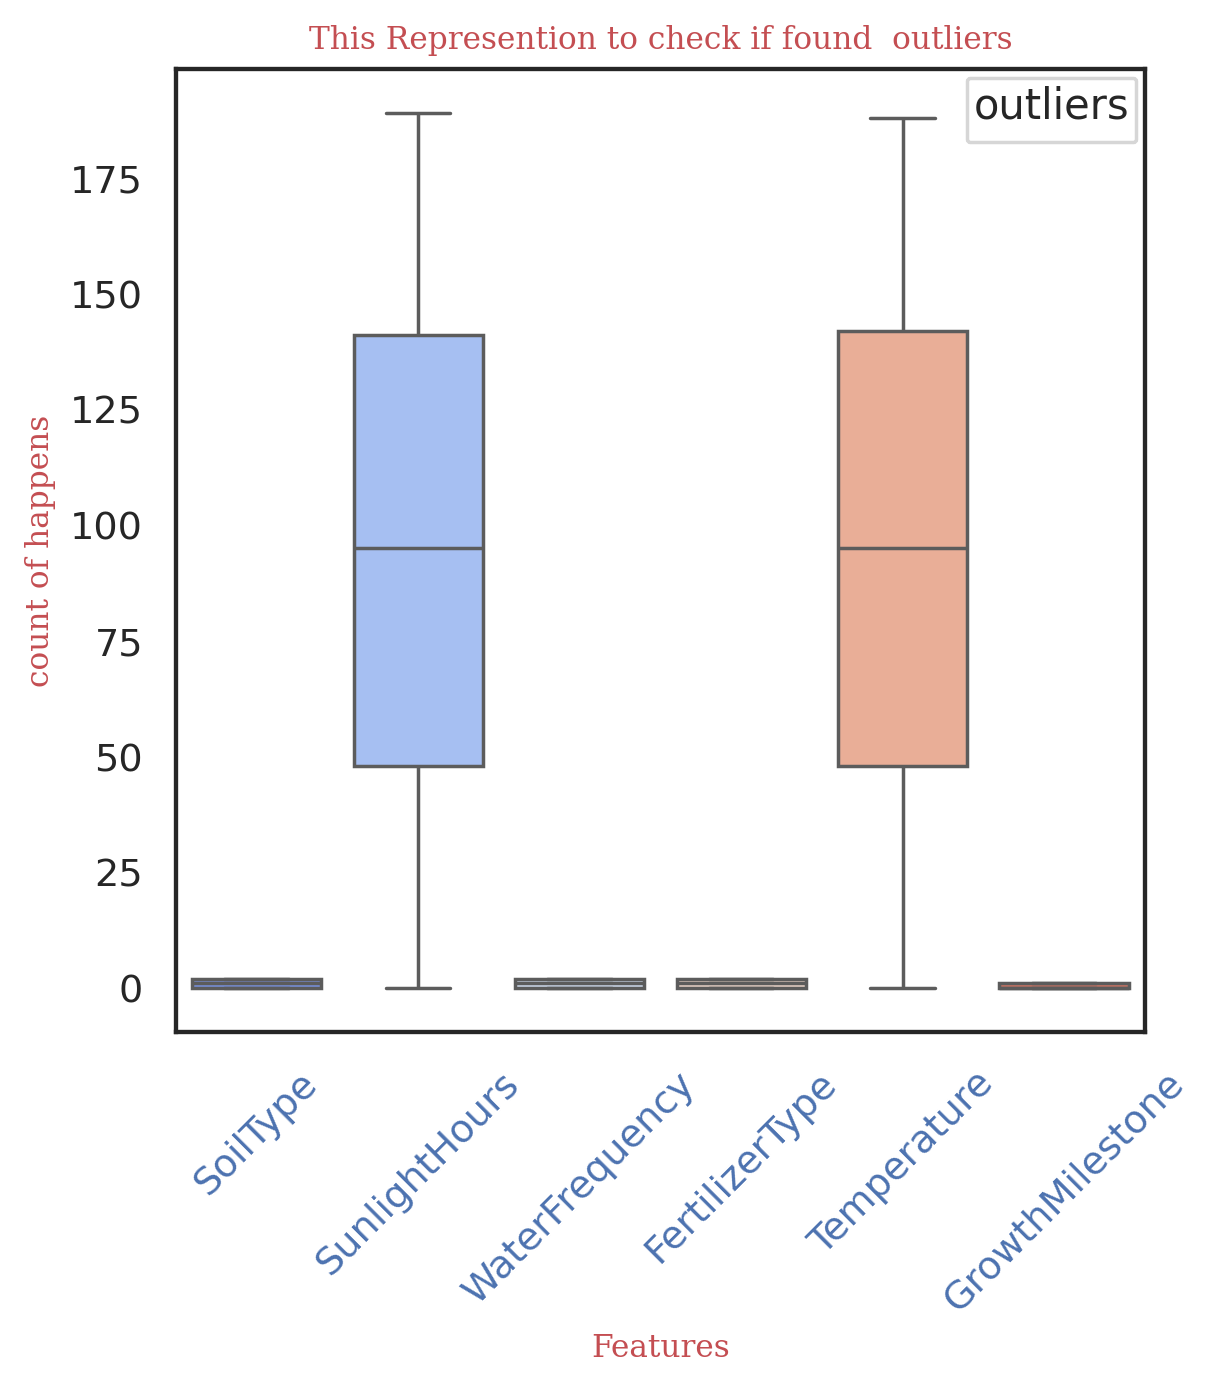

In [30]:
# from this Represention we discover that we found  NO outliers  :
f1={"family":"serif","size":9,"color":"r"}
plt.figure(figsize=(5,5),dpi=250)
plt.title("This Represention to check if found  outliers",fontdict=f1)
plt.xlabel("Features",fontdict=f1)
plt.ylabel("count of happens",fontdict=f1)
plt.xticks(rotation=45,color="b")
sns.boxplot(data[features])
plt.legend(title="outliers",prop={'size': 5})

In [31]:
# Check if there are aduplicated values in the data and remove it if found any  :
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [32]:
data.drop_duplicates()

,SoilType,SunlightHours,WaterFrequency,FertilizerType,Temperature,Humidity,GrowthMilestone
0,1,37,0,0,169,113,0
1,2,0,2,2,136,58,1
2,1,165,0,1,74,28,0
3,1,141,0,1,29,32,0
4,2,148,0,2,24,123,0
...,...,...,...,...,...,...,...
188,2,54,1,1,126,154,0
189,0,122,2,0,151,98,1
190,1,30,0,1,85,115,0
191,2,143,1,2,125,148,1


In [33]:
# After all of this process the data become Cleaning and ready to training :
#split the data:

x=data.drop(columns="GrowthMilestone",axis=1)
y=data["GrowthMilestone"]
print(np.shape(x),np.shape(y))
print(len(x),len(y))

(193, 6) (193,)
193 193


In [34]:
#train the dataset:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
print(np.shape(x_train),np.shape(x_test))
print(np.shape(y_train),np.shape(x_test))

(154, 6) (39, 6)
(154,) (39, 6)


# Some Another Statistical Methods :

In [35]:
# VaraianceThreshold:
selector=VarianceThreshold(threshold=0.01)
selector.fit(data.select_dtypes("number"))

VarianceThreshold(threshold=0.01)

In [36]:
num_cols=data.select_dtypes("number").columns
num_cols[selector.get_support(indices=True)]

Index(['SoilType', 'SunlightHours', 'WaterFrequency', 'FertilizerType',
       'Temperature', 'Humidity', 'GrowthMilestone'],
      dtype='object')

In [37]:
class Var_Selector(BaseEstimator,TransformerMixin):
    
    def __init__(self,num_cols):
        self.num_cols=None
    def fit(self,data):
        self.num_cols=data.select_dtypes("number").columns
        return self
    def transform(self,data):
        selector=VarianceThreshold(threshold=0.01)
        selector.fit(data[self.num_cols])
        
        removed_cols=[column for column in self.num_cols if column not in \
                     self.num_cols[selector.get_support(indices=True)]]
        data=data.drop(columns=removed_cols)
        
        # remove high-low cardinality categorical:-
        
        removed_cols=data.nunique()[((data.nunique()==1)|data.nunique()==len(data))].index
        
        return data.drop(columns=removed_cols)
        

In [38]:
transform=Var_Selector(data)
transform.fit(data)
transform.transform(data)

,SoilType,SunlightHours,WaterFrequency,FertilizerType,Temperature,Humidity,GrowthMilestone
0,1,37,0,0,169,113,0
1,2,0,2,2,136,58,1
2,1,165,0,1,74,28,0
3,1,141,0,1,29,32,0
4,2,148,0,2,24,123,0
...,...,...,...,...,...,...,...
188,2,54,1,1,126,154,0
189,0,122,2,0,151,98,1
190,1,30,0,1,85,115,0
191,2,143,1,2,125,148,1


In [39]:
# Check if there are aduplicated values in the data:
df=data
duplicated_features=df.duplicated().sum()
print("Number of duplicates ----->>> ",duplicated_features)

Number of duplicates ----->>>  0


In [40]:
data.drop(duplicated_features)

,SoilType,SunlightHours,WaterFrequency,FertilizerType,Temperature,Humidity,GrowthMilestone
1,2,0,2,2,136,58,1
2,1,165,0,1,74,28,0
3,1,141,0,1,29,32,0
4,2,148,0,2,24,123,0
5,2,158,0,1,41,134,0
...,...,...,...,...,...,...,...
188,2,54,1,1,126,154,0
189,0,122,2,0,151,98,1
190,1,30,0,1,85,115,0
191,2,143,1,2,125,148,1


                 SoilType  SunlightHours  WaterFrequency  FertilizerType  \
SoilType         1.000000      -0.138835       -0.088244       -0.009405   
SunlightHours   -0.138835       1.000000        0.116473        0.043355   
WaterFrequency  -0.088244       0.116473        1.000000        0.066926   
FertilizerType  -0.009405       0.043355        0.066926        1.000000   
Temperature     -0.012836      -0.098613       -0.024155        0.129457   
Humidity        -0.035033      -0.028674        0.095354        0.036663   
GrowthMilestone  0.031354      -0.125214        0.006565        0.098864   

                 Temperature  Humidity  GrowthMilestone  
SoilType           -0.012836 -0.035033         0.031354  
SunlightHours      -0.098613 -0.028674        -0.125214  
WaterFrequency     -0.024155  0.095354         0.006565  
FertilizerType      0.129457  0.036663         0.098864  
Temperature         1.000000  0.089883        -0.054069  
Humidity            0.089883  1.000000     

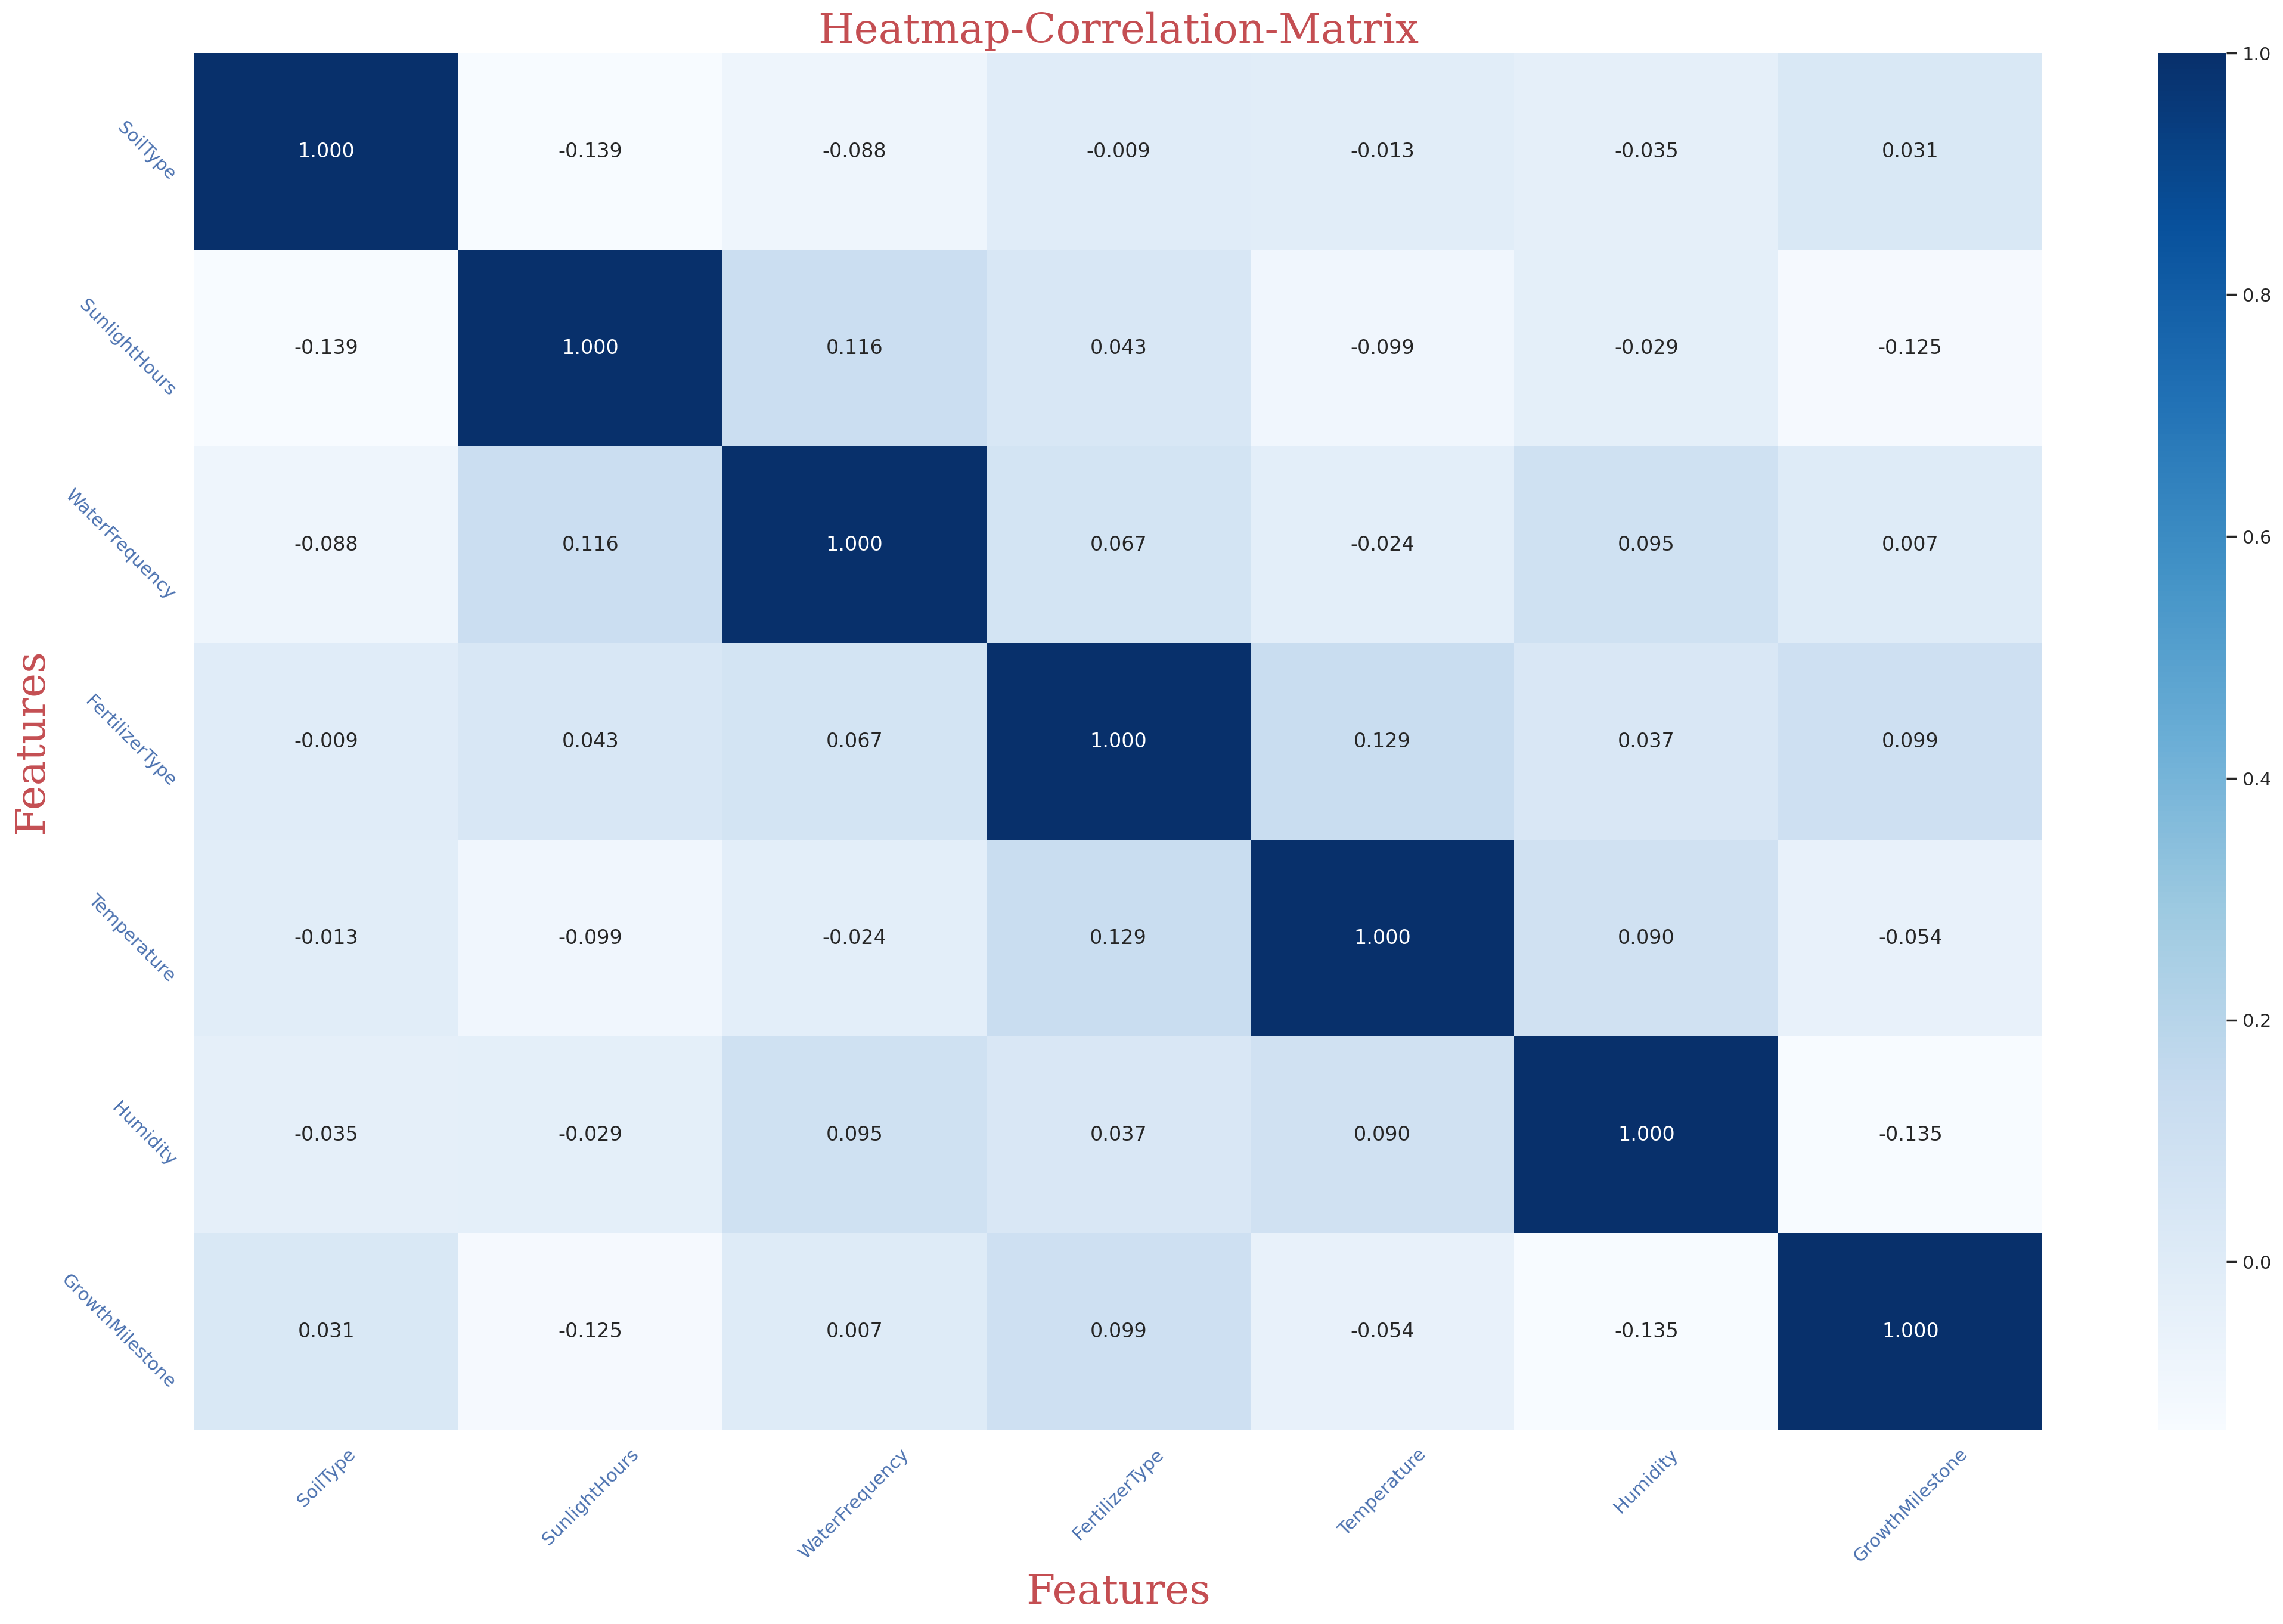

In [41]:
# calculate all Types of correlation & plot correlation_matrix :

corr=data.select_dtypes("number").corr()
print(corr)

print("-"*50)

kendall=data.select_dtypes("number").corr(method="kendall")
print(kendall)

print("-"*50)

spearman=data.select_dtypes("number").corr(method="spearman")
print(spearman)

print("-"*50)

pearson=data.select_dtypes("number").corr(method="pearson")
print(pearson)

print("-"*50)

# plot the correlation Matrix :

plt.figure(figsize=(25,15),dpi=200)
plt.title("Heatmap-Correlation-Matrix",fontdict=f)
sns.heatmap(data.select_dtypes("number").corr(),annot=True,fmt="0.3f",cmap='Blues')
plt.xlabel("Features",fontdict=f)
plt.ylabel("Features",fontdict=f)
plt.xticks(rotation=45,color="b")
plt.yticks(rotation=-45,color="b")
plt.show()

In [42]:
# Extract the most important Numerical Features:

fs=SelectKBest(score_func=f_classif,k=6)
fs.fit(data.drop(columns="GrowthMilestone").select_dtypes("number").fillna(0),data["GrowthMilestone"])

SelectKBest(k=6)

In [43]:
featurs_values=pd.DataFrame(fs.pvalues_)
features_scores=pd.DataFrame(fs.scores_)
features=pd.DataFrame(data.drop(columns="GrowthMilestone").select_dtypes("number").fillna(0).columns)
feature_score=pd.concat([featurs_values,features_scores,features],axis=1)
feature_score.columns=["pvalues","score","input"]
feature_score

,pvalues,score,input
0,0.665121,0.187946,SoilType
1,0.082730,3.042296,SunlightHours
2,0.927805,0.008231,WaterFrequency
3,0.171345,1.885283,FertilizerType
4,0.455171,0.560023,Temperature
5,0.061572,3.536018,Humidity


In [44]:
# Extract the most important Categorical Features :
from sklearn.feature_selection import mutual_info_classif

mic=SelectKBest(score_func=mutual_info_classif,k=6)
mic.fit(data.drop(columns="GrowthMilestone").select_dtypes("number").fillna(0),data["GrowthMilestone"])

features_MI_scores=pd.Series(mic.scores_,index=data.drop(columns="GrowthMilestone").select_dtypes("number").fillna(0).columns)
features_MI_scores.sort_values(ascending=True)

SunlightHours     0.000000
Temperature       0.000000
SoilType          0.018282
WaterFrequency    0.029167
FertilizerType    0.051695
Humidity          0.071191
dtype: float64

## Part2 : preparing the data & build the models

## preparing the Data :

In [45]:
# Handle the missing Values:
#1-check the missing values:

data.isnull().sum()

SoilType           0
SunlightHours      0
WaterFrequency     0
FertilizerType     0
Temperature        0
Humidity           0
GrowthMilestone    0
dtype: int64

In [46]:
# fill the null values 

# Load your dataset into a pandas dataframe
df = data

# Fill null values in numeric columns with the median of the column
numeric_cols = df.select_dtypes("number").columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill null values in object columns with the mode of the column
object_cols = df.select_dtypes(include=['object']).columns
df[object_cols] = df[object_cols].fillna(df[object_cols].mode())


In [47]:
data.isna().mean()

SoilType           0.0
SunlightHours      0.0
WaterFrequency     0.0
FertilizerType     0.0
Temperature        0.0
Humidity           0.0
GrowthMilestone    0.0
dtype: float64

In [48]:
# 1- RandomForestClassifier :
RC1=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100)
RC1.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=42)

In [49]:
RC1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [50]:
#predict the model:

y_predict=RC1.predict(x_test)
y_predict[:10]

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [51]:
# compute the accuracy:
print(f"accuracy ---->>> {RC1.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 58.97%


In [52]:
#improve from accuracy:
np.random.seed()
for i in range(10,110,10):
    print(f"at n_estimators= {i} n_estimators")
    RC2=RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"accuracy={RC2.score(x_test,y_test)*100:0.2f}%")

at n_estimators= 10 n_estimators
accuracy=51.28%
at n_estimators= 20 n_estimators
accuracy=53.85%
at n_estimators= 30 n_estimators
accuracy=46.15%
at n_estimators= 40 n_estimators
accuracy=53.85%
at n_estimators= 50 n_estimators
accuracy=46.15%
at n_estimators= 60 n_estimators
accuracy=48.72%
at n_estimators= 70 n_estimators
accuracy=48.72%
at n_estimators= 80 n_estimators
accuracy=56.41%
at n_estimators= 90 n_estimators
accuracy=51.28%
at n_estimators= 100 n_estimators
accuracy=58.97%


accuracy:58.97%
squared_Error:0.41025641025641024
**************************************************
True positve prediction : 12
True Negative predicion : 11
False positve prediction: 7
False Negative prediction: 9
**************************************************
 precsion_score :57.14%
recall_score:63.16%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.61      0.55      0.58        20
           1       0.57      0.63      0.60        19

    accuracy                           0.59        39
   macro avg       0.59      0.59      0.59        39
weighted avg       0.59      0.59      0.59        39

Confision Matrix --->> 
  [[11  9]
 [ 7 12]]


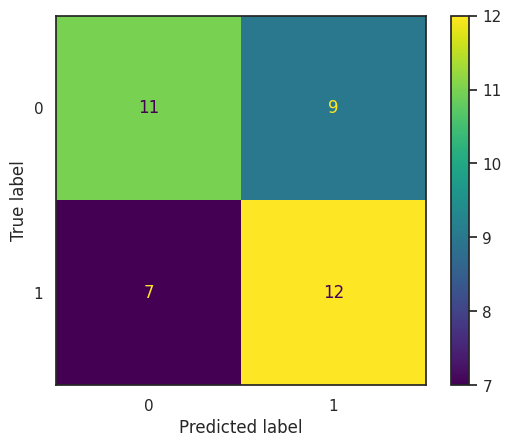

In [53]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_predict)*100:0.2f}%")

print(f"squared_Error:{metrics.mean_squared_error(y_test,y_predict)}")
print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_predict)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_predict)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test,y_predict)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test,y_predict)
print("Confision Matrix --->> \n ",conf_matrix)

display=metrics.ConfusionMatrixDisplay(conf_matrix)

display.plot()



In [54]:
# 2- DecisionTree Model:
DT=tree.DecisionTreeClassifier(random_state=42,max_depth=5)
DT.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [55]:
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [56]:
y_predic=DT.predict(x_test)
y_predic[:10]

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0])

In [57]:
# compute the accuracy:
print(f"accuracy ---->>> {DT.score(x_test,y_test)*100:0.2f}%")

accuracy ---->>> 51.28%


In [58]:
# explain the prediction:
tree_representation = tree.export_text(DT,feature_names=list(x.columns))
print(tree_representation)

|--- FertilizerType <= 1.50
|   |--- FertilizerType <= 0.50
|   |   |--- Temperature <= 140.00
|   |   |   |--- SunlightHours <= 65.00
|   |   |   |   |--- WaterFrequency <= 1.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- WaterFrequency >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- SunlightHours >  65.00
|   |   |   |   |--- Humidity <= 32.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Humidity >  32.50
|   |   |   |   |   |--- class: 1
|   |   |--- Temperature >  140.00
|   |   |   |--- Humidity <= 105.50
|   |   |   |   |--- SoilType <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- SoilType >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Humidity >  105.50
|   |   |   |   |--- class: 0
|   |--- FertilizerType >  0.50
|   |   |--- SunlightHours <= 79.50
|   |   |   |--- SunlightHours <= 55.00
|   |   |   |   |--- Humidity <= 102.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Humidity >  102.50
|   |   |   |   |   

accuracy:51.28%
squared_Error:0.48717948717948717
**************************************************
True positve prediction : 12
True Negative predicion : 8
False positve prediction: 7
False Negative prediction: 12
**************************************************
 precsion_score :50.00%
recall_score:63.16%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.53      0.40      0.46        20
           1       0.50      0.63      0.56        19

    accuracy                           0.51        39
   macro avg       0.52      0.52      0.51        39
weighted avg       0.52      0.51      0.51        39

Confision Matrix --->> 
  [[ 8 12]
 [ 7 12]]


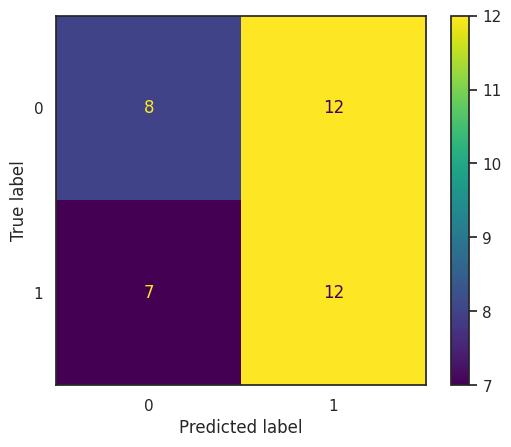

In [60]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_predic)*100:0.2f}%")
print(f"squared_Error:{metrics.mean_squared_error(y_test,y_predic)}")
print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_predic)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_predic)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_predict)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test,y_predic)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test,y_predic)
print("Confision Matrix --->> \n ",conf_matrix)

display=metrics.ConfusionMatrixDisplay(conf_matrix)
display.plot()

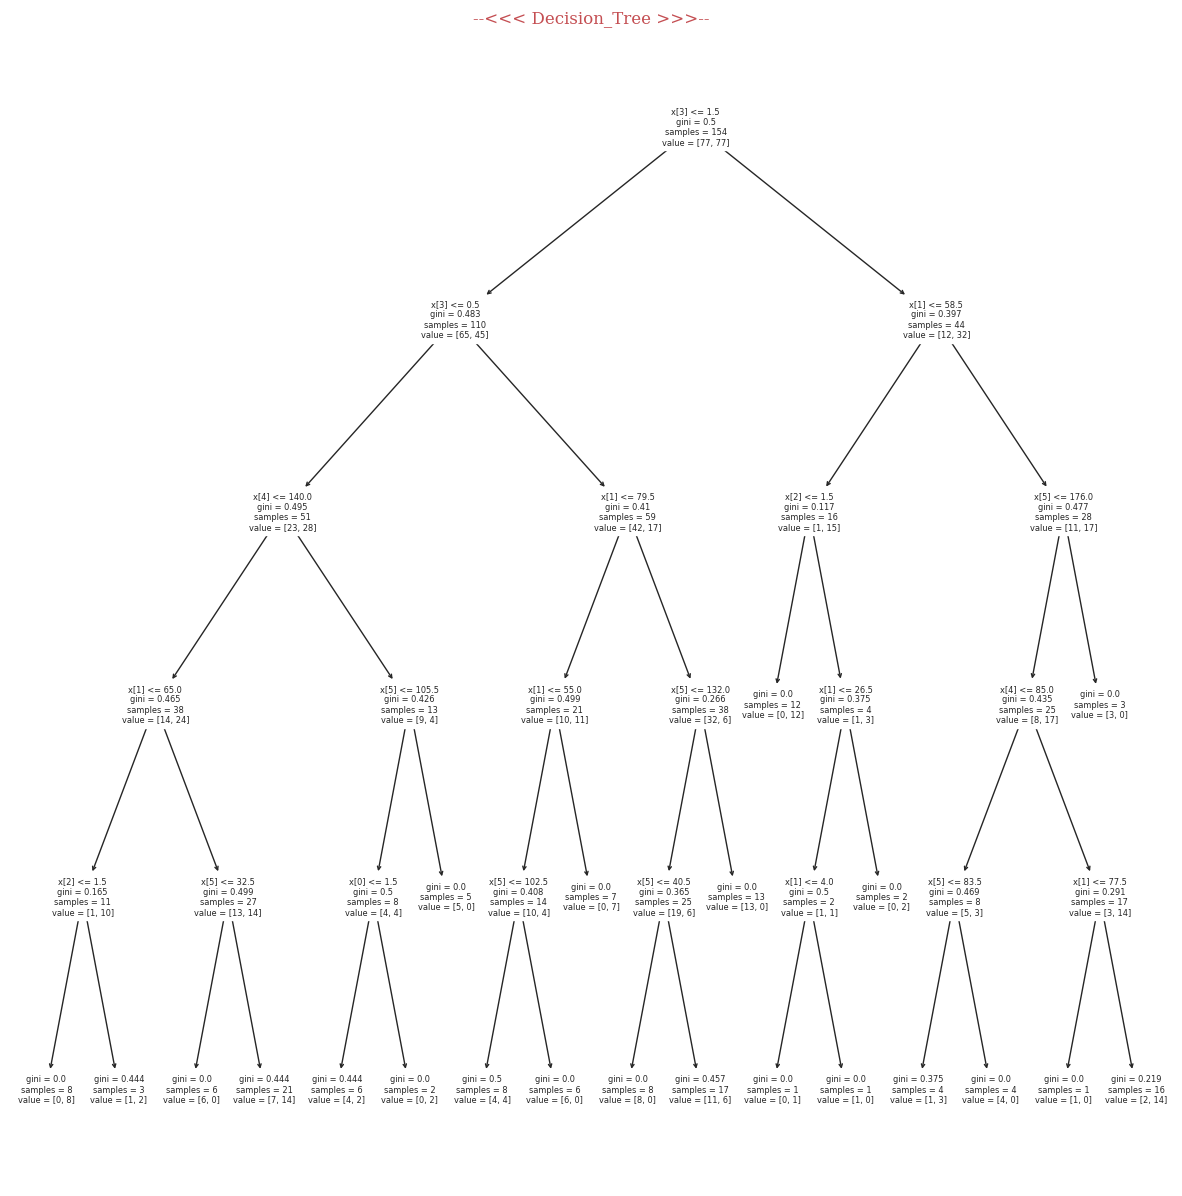

In [61]:
#plot the tree :

# if i want to plot tree:

f={"color":"r","family":"serif","size":12}

plt.figure(figsize=(15,15),dpi=100) 
tree.plot_tree(DT)
plt.title("--<<< Decision_Tree >>>--",fontdict=f)
plt.show()

In [62]:
# 3- svm Model :
SV=svm.SVC(random_state=42,kernel="linear" )
SV.fit(x_train,y_train)


SVC(kernel='linear', random_state=42)

In [63]:
y_pred=SV.predict(x_test)
y_pred[:10]

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0])

In [64]:
#Evalute the model:
print("Sqare Error --->>",metrics.mean_squared_error(y_test,y_pred))
print("accuracy --->>>",SV.score(x_test,y_test)*100)

Sqare Error --->> 0.5128205128205128
accuracy --->>> 48.717948717948715


accuracy:48.72%
squared_mean:0.5128205128205128
**************************************************
True positve prediction : 9
True Negative predicion : 10
False positve prediction: 10
False Negative prediction: 10
**************************************************
 precsion_score :47.37%
recall_score:47.37%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.47      0.47      0.47        19

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.49        39
weighted avg       0.49      0.49      0.49        39

Confision Matrix --->> 
  [[10 10]
 [10  9]]


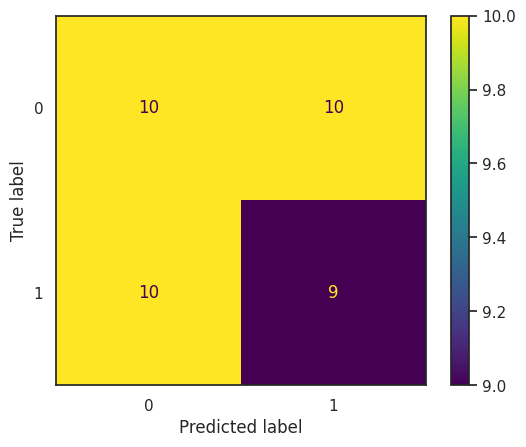

In [65]:
# Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pred)*100:0.2f}%")
print(f"squared_mean:{metrics.mean_squared_error(y_test,y_pred)}")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pred)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_pred)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pred)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test, y_pred)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test, y_pred)
print("Confision Matrix --->> \n ",conf_matrix)

display=metrics.ConfusionMatrixDisplay(conf_matrix)
display.plot()


In [66]:
# 4-create model of LogisticRegression  --->> Classification

lg=LogisticRegression(random_state=42,multi_class='auto',n_jobs=-1)
lg.fit(x_train,y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [67]:
lg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [68]:
y_pr=lg.predict(x_test)
y_pr[:15]

array([0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1])

In [69]:
# Evalute the model:
print("Mean Square Error--->>",metrics.mean_squared_error(y_test,y_pr)*100)
print("accuracy --->>>",lg.score(x_test,y_test)*100)

Mean Square Error--->> 53.84615384615385
accuracy --->>> 46.15384615384615


accuracy:46.15%
**************************************************
True positve prediction : 10
True Negative predicion : 8
False positve prediction: 9
False Negative prediction: 12
**************************************************
 precsion_score :45.45%
recall_score:52.63%
**************************************************
Classification_report --->> 
               precision    recall  f1-score   support

           0       0.47      0.40      0.43        20
           1       0.45      0.53      0.49        19

    accuracy                           0.46        39
   macro avg       0.46      0.46      0.46        39
weighted avg       0.46      0.46      0.46        39

Confision Matrix --->> 
  [[ 8 12]
 [ 9 10]]


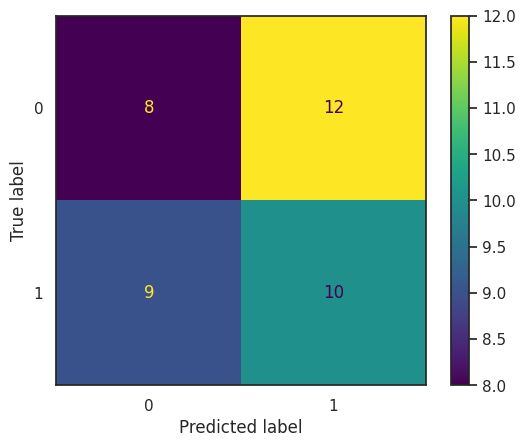

In [70]:
#Evaluation Model (matrices):

print(f"accuracy:{metrics.accuracy_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pr)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("*"*50)

#precision_score & recall_score :

print(f" precsion_score :{metrics.precision_score(y_test,y_pr)*100:0.2f}%")
print(f"recall_score:{metrics.recall_score(y_test,y_pr)*100:0.2f}%")

print("*"*50)

# classification Report :

class_report=classification_report(y_test, y_pr)
print("Classification_report --->> \n",class_report)

# confusion_matrix :

conf_matrix=confusion_matrix(y_test, y_pr)
print("Confision Matrix --->> \n ",conf_matrix)

display=metrics.ConfusionMatrixDisplay(conf_matrix)
display.plot()

prediction --->>  
 [0 1 1 0 1 0 0 1 0 0]
--------------------------------------------------
Mean Square Error--->> 51.28205128205128
--------------------------------------------------
True positve prediction : 9
True Negative predicion : 10
False positve prediction: 10
False Negative prediction: 10
--------------------------------------------------
Accuracy: 48.72%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.50      0.50        20
           1       0.47      0.47      0.47        19

    accuracy                           0.49        39
   macro avg       0.49      0.49      0.49        39
weighted avg       0.49      0.49      0.49        39

--------------------------------------------------
Confision_MAtrix
[[10 10]
 [10  9]]


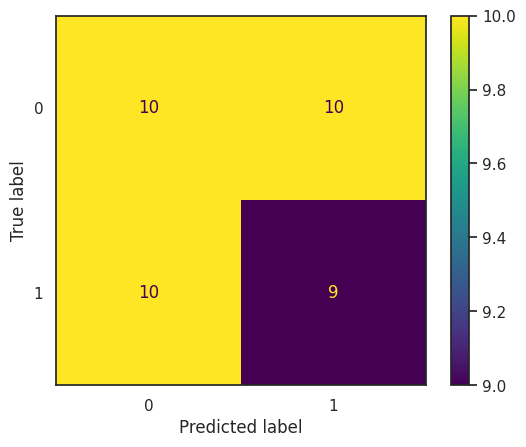

In [71]:
# 5- Create the Naive Bayes Classifier
NV = GaussianNB()

# Train the model
NV.fit(x_train, y_train)


# Make predictions

y_pre = NV.predict(x_test)
print("prediction --->>  \n",y_pr[:10])
print("-"*50)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pre)
report = classification_report(y_test, y_pre)
print("Mean Square Error--->>",metrics.mean_squared_error(y_test,y_pre)*100)

print("-"*50)
# confision_Matrix :

conf_matrix=confusion_matrix(y_test, y_pre)


# Hypothesis & performance of the model :

cm=metrics.confusion_matrix(y_test,y_pre)
tp,tn,fp,fn= cm[1,1],cm[0,0],cm[1,0],cm[0,1]

print("True positve prediction :",tp)
print("True Negative predicion :",tn)
print("False positve prediction:",fp)
print("False Negative prediction:",fn)

print("-"*50)

print(f"Accuracy: {accuracy*100:0.2f}%")
print("-"*50)
print("Classification Report:")
print(report)
print("-"*50)
print("Confision_MAtrix")
print(conf_matrix)

display=metrics.ConfusionMatrixDisplay(conf_matrix)
display.plot()

 ## Bulding a Neural Network model By using Tensorflow

In [72]:
# imports :
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense,Input,Dropout
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.regularizers import l2

2024-07-10 14:17:06.108467: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-10 14:17:06.109862: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 14:17:06.136476: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-10 14:17:06.137091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-10 14:17:06.704508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [73]:
#Build the model:

model=Sequential([
    
    Input(shape=[6]),
    
    Dense(units=128,activation="relu"),
    Dropout(0.1),
    
    Dense(units=256,activation="relu"),
    Dropout(0.2),

    Dense(units=512,activation="relu"),
    Dropout(0.3),

    Dense(units=256,activation="relu"),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid"),
        
               ])
model

2024-07-10 14:17:07.193848: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-10 14:17:07.194288: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [74]:
# Compile the model
model.compile(
    optimizer='adam',
    loss=BinaryCrossentropy(from_logits=True),  # Use from_logits=True for logits output
    metrics=['accuracy']
)

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               896       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               1

In [76]:
# Fit the model
AN=model.fit(x_train, y_train, epochs=20, batch_size=35, validation_split=0.1)
AN

Epoch 1/20


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 1s 38ms/step - loss: 5.6075 - accuracy: 0.5145 - val_loss: 9.2785 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 3.7944 - accuracy: 0.5435 - val_loss: 1.7056 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 4.1144 - accuracy: 0.4130 - val_loss: 0.9327 - val_accuracy: 0.3750
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 2.7763 - accuracy: 0.5072 - val_loss: 3.1151 - val_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 1.8333 - accuracy: 0.5580 - val_loss: 0.7150 - val_accuracy: 0.6875
Epoch 6/20
4/4 [==============================] - 0s 9ms/step - loss: 1.6150 - accuracy: 0.4783 - val_loss: 0.6328 - val_accuracy: 0.6875
Epoch 7/20
1/4 [======>.......................] - ETA: 0s - loss: 1.6152 - accuracy: 0.4571

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 0s 10ms/step - loss: 1.1526 - accuracy: 0.5217 - val_loss: 1.1085 - val_accuracy: 0.2500
Epoch 8/20
4/4 [==============================] - 0s 8ms/step - loss: 1.0716 - accuracy: 0.5507 - val_loss: 1.0040 - val_accuracy: 0.2500
Epoch 9/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9042 - accuracy: 0.6014 - val_loss: 0.6636 - val_accuracy: 0.6250
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 0.9464 - accuracy: 0.5145 - val_loss: 0.6744 - val_accuracy: 0.6250
Epoch 11/20
4/4 [==============================] - 0s 9ms/step - loss: 0.8238 - accuracy: 0.5725 - val_loss: 0.8526 - val_accuracy: 0.4375
Epoch 12/20
4/4 [==============================] - 0s 9ms/step - loss: 0.8008 - accuracy: 0.6014 - val_loss: 0.8482 - val_accuracy: 0.4375
Epoch 13/20
4/4 [==============================] - 0s 7ms/step - loss: 0.7961 - accuracy: 0.5725 - val_loss: 0.7586 - val_accuracy: 0.5625
Epoch 14/20
4/4 [=======================

In [77]:
# predict on the model:
y_prediction=model.predict(x_test)
y_prediction[:10]

2/2 [==============================] - 0s 2ms/step


array([[0.48108992],
       [0.49758574],
       [0.5758281 ],
       [0.3817512 ],
       [0.7836665 ],
       [0.44985875],
       [0.38935927],
       [0.613346  ],
       [0.4379759 ],
       [0.304521  ]], dtype=float32)

In [78]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_prediction)} \n the max_value for prediction --->>> {np.max(y_prediction)}")

the min_value for prediction --->> 0.24663668870925903 
 the max_value for prediction --->>> 0.7836664915084839


In [79]:
#Evalute the score:

model.evaluate(x_test,y_test,verbose=2)

2/2 - 0s - loss: 0.7054 - accuracy: 0.6410 - 16ms/epoch - 8ms/step


[0.705379068851471, 0.6410256624221802]

In [80]:
# Build Regulized model: (Sequentail Api Regulized) -->> to improve from the accuracy 

model_r=Sequential([
    
    Input(shape=[6]),
    
    Dense(units=128,activation="relu",kernel_regularizer=l2(0.01)),
    Dropout(0.1),
    
    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),

    Dense(units=512,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.3),

    Dense(units=256,activation="relu",kernel_regularizer=l2(.01)),
    Dropout(0.2),
    
    Dense(units=1,activation="sigmoid",kernel_regularizer=l2(.01)),
        
    
                  ])
model_r


In [81]:
#compile:
model_r.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"]
  )

In [82]:
history=model_r.fit(x_train,y_train,epochs=20,batch_size=35,validation_split=0.1,)
history

Epoch 1/20


/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 1s 37ms/step - loss: 15.2412 - accuracy: 0.4710 - val_loss: 19.4220 - val_accuracy: 0.2500
Epoch 2/20
4/4 [==============================] - 0s 8ms/step - loss: 13.3603 - accuracy: 0.4855 - val_loss: 8.7456 - val_accuracy: 0.7500
Epoch 3/20
4/4 [==============================] - 0s 7ms/step - loss: 10.8061 - accuracy: 0.4710 - val_loss: 8.5834 - val_accuracy: 0.7500
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 9.2303 - accuracy: 0.5797 - val_loss: 10.0752 - val_accuracy: 0.2500
Epoch 5/20
4/4 [==============================] - 0s 7ms/step - loss: 9.1486 - accuracy: 0.5435 - val_loss: 8.3584 - val_accuracy: 0.4375
Epoch 6/20
4/4 [==============================] - 0s 12ms/step - loss: 8.5959 - accuracy: 0.5000 - val_loss: 7.9329 - val_accuracy: 0.5625
Epoch 7/20
1/4 [======>.......................] - ETA: 0s - loss: 8.3273 - accuracy: 0.4571

/home/abdalrahman/.local/lib/python3.8/site-packages/keras/src/backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 [==============================] - 0s 7ms/step - loss: 8.1672 - accuracy: 0.5435 - val_loss: 7.8205 - val_accuracy: 0.3750
Epoch 8/20
4/4 [==============================] - 0s 7ms/step - loss: 7.8912 - accuracy: 0.5072 - val_loss: 7.7957 - val_accuracy: 0.2500
Epoch 9/20
4/4 [==============================] - 0s 7ms/step - loss: 7.7672 - accuracy: 0.4348 - val_loss: 7.4979 - val_accuracy: 0.3125
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 7.5411 - accuracy: 0.4783 - val_loss: 7.2830 - val_accuracy: 0.3125
Epoch 11/20
4/4 [==============================] - 0s 7ms/step - loss: 7.3005 - accuracy: 0.4928 - val_loss: 7.0709 - val_accuracy: 0.5625
Epoch 12/20
4/4 [==============================] - 0s 7ms/step - loss: 7.2154 - accuracy: 0.5000 - val_loss: 7.0251 - val_accuracy: 0.4375
Epoch 13/20
4/4 [==============================] - 0s 7ms/step - loss: 7.0780 - accuracy: 0.4855 - val_loss: 7.0196 - val_accuracy: 0.3125
Epoch 14/20
4/4 [========================

In [83]:
# predict on the model:
y_p=model_r.predict(x_test)
y_p[:10]

2/2 [==============================] - 0s 2ms/step


array([[0.5540901 ],
       [0.5142496 ],
       [0.6022713 ],
       [0.5665933 ],
       [0.7276417 ],
       [0.5347097 ],
       [0.42125335],
       [0.6331807 ],
       [0.46104982],
       [0.5424908 ]], dtype=float32)

In [84]:
# compute min & max in the y_prediction:
print(f"the min_value for prediction --->> {np.min(y_p)} \n the max_value for prediction --->>> {np.max(y_p)} ")

the min_value for prediction --->> 0.34134337306022644 
 the max_value for prediction --->>> 0.7276417016983032 


In [85]:
#Evalute the score:

model_r.evaluate(x_test,y_test,verbose=2)

2/2 - 0s - loss: 6.1234 - accuracy: 0.5128 - 13ms/epoch - 7ms/step


[6.123422622680664, 0.5128205418586731]

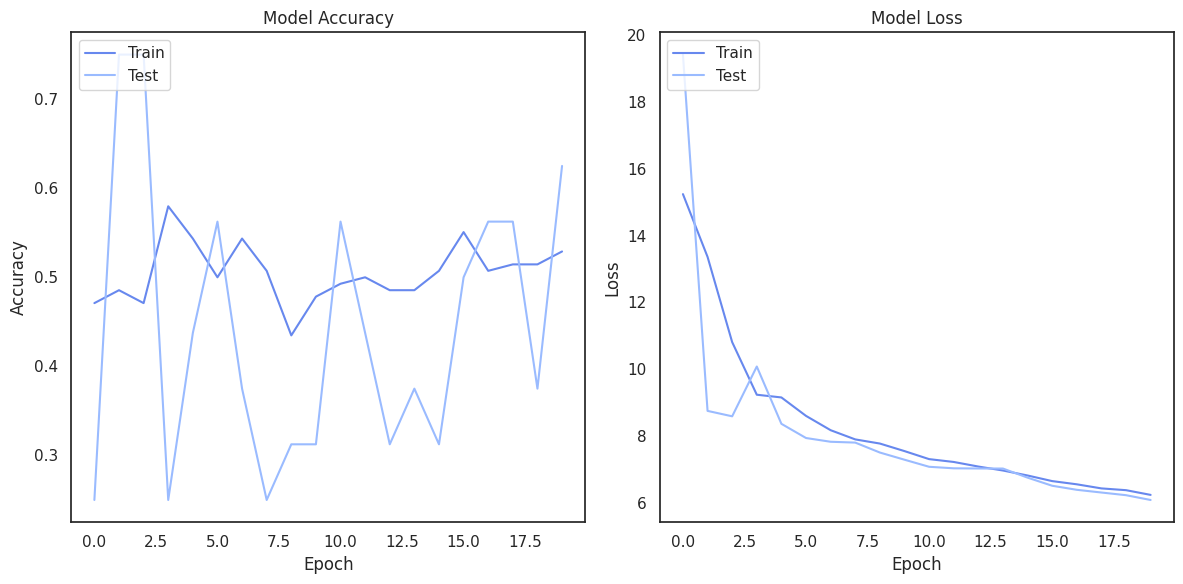

In [86]:
# Plotting training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

##  some Results about the machine learning models :
      *  1- RandomForestClassifier : accuracy -->> %58.97%and after improve the model we found  at n_estimators= 20 
           accuracy --->> 64.10% and that mean that accuracy increase by 5.13%

      *  2-DecissionTreeClassifier : accuracy -->> 51.28% % 

      *  3-Support Vector Machine : accuracy -->> 48.72%

      *  4-LogisticRegression : accuracy -->> 53.85% 

      *  5-Naivebayes : accuracy -->> 53.84% 

   * we cant say that the best model is   RandomForestClassifier & LogisticRegression  because every model has advantages and disadvantages , but this
         2 models give us the highly accuracy .
   * That was our results from Traditional machine learning models .

   * About Neural Network models that build by using Tensorflow we found that  :  accuracy --->>  67.66% and the same after improvement .      